In [1]:
import torch
import torchsummary
from torchsummary import summary
from torchvision import models

import copy
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import os
import yaml
import json

import pylab
pylab.rc('font', family='serif', size=14)

In [2]:
import socket
if socket.gethostname()[0:4] in  ['node','holm','wats']:
    path_prefix = '/rigel/issa/users/Tahereh/Research'
elif socket.gethostname() == 'SYNPAI':
    path_prefix = '/hdd6gig/Documents/Research'
elif socket.gethostname()[0:2] == 'ax':
    path_prefix = '/home/tt2684/Research'

resultsdir = path_prefix + '/Results/Symbio/Symbio/'

selected_config_keys = ['archd', 'arche','batch_size','patienced', 'patiencee','wdB', 
                        'wdF' ,'optimizerB', 'optimizerF','dataset',
'lrB', 'lrF', 'momentumB', 'momentumF','base_channels','epochs','runname']

In [3]:
'''
    For the given path, get the List of all files in the directory tree 
'''
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

In [45]:
# for p in all_paths:
#         if 'autoencoder' in p and '.json' in p:
#             print(os.path.getsize(p), p.split('/')[-2:])
#             print(os.remove(p))

In [90]:
configs.keys()

dict_keys(['archd', 'arche', 'base_channels', 'batch_size', 'customdatasetdir_train', 'databasedir', 'dataset', 'dist_backend', 'dist_url', 'epochs', 'evaluate', 'factord', 'factore', 'gamma', 'gpu', 'hash', 'imagesetdir', 'input_size', 'loadinitialization', 'lossfuncB', 'lrB', 'lrF', 'momentumB', 'momentumF', 'multiprocessing_distributed', 'n_classes', 'normalization_noaffine', 'note', 'offset', 'optimizerB', 'optimizerF', 'path_prefix', 'path_save_model', 'patienced', 'patiencee', 'pretrained', 'primitive_weights', 'print_freq', 'rank', 'resultsdir', 'resume', 'runname', 'seed', 'start_epoch', 'step', 'tensorboarddir', 'time', 'wdB', 'wdF', 'workers', 'world_size'])

In [18]:
runnames_list = [

'Oct26-12-08_CIFAR10_4623412840_469',
    
'Oct22-15-24_CIFAR10_4623412840_hypsaymresnet18mtm_917',
'Oct22-15-24_CIFAR10_4623412840_hypsaymresnet18mtm_865',
'Oct22-15-24_CIFAR10_4623412840_hypsaymresnet18mtm_736',
'Oct22-15-25_CIFAR10_4623412840_hypsaymresnet18mtm_881',
    
'Oct23-06-38_CIFAR10_4623412840_hypsaymresnet18lr_83',
'Oct23-06-38_CIFAR10_4623412840_hypsaymresnet18lr_579',
'Oct23-06-38_CIFAR10_4623412840_hypsaymresnet18lr_893',
'Oct23-06-38_CIFAR10_4623412840_hypsaymresnet18lr_353',
'Oct23-06-38_CIFAR10_4623412840_hypsaymresnet18lr_685',
'Oct23-06-38_CIFAR10_4623412840_hypsaymresnet18lr_744',
'Oct23-06-38_CIFAR10_4623412840_hypsaymresnet18lr_629',

'Oct26-09-07_CIFAR10_4623412840_113',
'Oct26-12-08_CIFAR10_4623412840_469',
    
'Oct28-11-49_CIFAR10_4623412840_hypsaymresnet18_667',
'Oct28-11-49_CIFAR10_4623412840_hypsaymresnet18_431',
'Oct28-11-49_CIFAR10_4623412840_hypsaymresnet18_928',
'Oct28-11-50_CIFAR10_4623412840_hypsaymresnet18_835'
    
]

In [56]:
runnames_list = [
'Oct30-14-45_CIFAR10_4d91649eea_aymresnet18_893_948',
'Oct30-14-45_CIFAR10_4d91649eea_aymresnet18_893_118',
'Oct30-14-46_CIFAR10_4d91649eea_aymresnet18_893_302',
'Oct30-14-46_CIFAR10_4d91649eea_aymresnet18_893_210',
'Oct30-14-46_CIFAR10_4d91649eea_aymresnet18_893_286',
]

In [16]:
runnames_list = [
'Oct28-14-51_MNIST_4d91649eea_TwoCostAEcontrolMNISTCorrSchedul_193',
'Oct28-14-51_MNIST_4d91649eea_TwoCostAEcontrolMNISTCorrSchedul_1012',
'Oct28-14-51_MNIST_4d91649eea_TwoCostAEcontrolMNISTCorrSchedul_422',
'Oct28-14-51_MNIST_4d91649eea_TwoCostAEcontrolMNISTCorrSchedul_663',
'Oct28-14-51_MNIST_4d91649eea_TwoCostAEcontrolMNISTCorrSchedul_106', 
]

In [12]:
runnames_list = [
'Oct15-14-10_MNIST_3327bc88e3_TwoCostAEcontrolMNIST_395',
'Oct15-14-10_MNIST_3327bc88e3_TwoCostAEcontrolMNIST_801',
'Oct15-14-10_MNIST_3327bc88e3_TwoCostAEcontrolMNIST_226',
'Oct15-14-10_MNIST_3327bc88e3_TwoCostAEcontrolMNIST_714',
'Oct15-14-11_MNIST_3327bc88e3_TwoCostAEcontrolMNIST_0',
'Oct15-14-11_MNIST_3327bc88e3_TwoCostAEcontrolMNIST_99',
'Oct15-14-11_MNIST_3327bc88e3_TwoCostAEcontrolMNIST_319',
'Oct15-14-11_MNIST_3327bc88e3_TwoCostAEcontrolMNIST_50',
'Oct15-14-11_MNIST_3327bc88e3_TwoCostAEcontrolMNIST_194',
'Oct15-14-11_MNIST_3327bc88e3_TwoCostAEcontrolMNIST_284',
'Oct15-14-17_MNIST_3327bc88e3_TwoCostAEcontrolMNIST_293',
'Oct15-14-17_MNIST_3327bc88e3_TwoCostAEcontrolMNIST_438',
    
]

In [6]:
runnames_list = [
'Oct29-16-04_MNIST_4d91649eea_TwoCostAEcontrolMNISTCorrSchedulBHModu_837',
'Oct29-16-04_MNIST_4d91649eea_TwoCostAEcontrolMNISTCorrSchedulBHModu_79',
'Oct29-21-17_MNIST_4d91649eea_TwoCostAEcontrolMNISTCorrSchedulBHModu_125',
'Oct29-21-17_MNIST_4d91649eea_TwoCostAEcontrolMNISTCorrSchedulBHModu_891',
'Oct29-21-17_MNIST_4d91649eea_TwoCostAEcontrolMNISTCorrSchedulBHModu_948',
]

In [48]:
runnames_list = [
    
'Nov03-11-49_CIFAR10_d0236dbe9e_hypAsymResNetL10_166',
'Nov03-11-49_CIFAR10_d0236dbe9e_hypAsymResNetL10_933',
'Nov03-11-49_CIFAR10_d0236dbe9e_hypAsymResNetL10_69',
'Nov03-11-49_CIFAR10_d0236dbe9e_hypAsymResNetL10_973',
'Nov03-11-49_CIFAR10_d0236dbe9e_hypAsymResNetL10_996',
]

In [51]:
runnames_list = [
'Nov04-13-32_CIFAR10_d0236dbe9e_AsymResNetL10Simple_794',
'Nov04-13-32_CIFAR10_d0236dbe9e_AsymResNetL10Simple_138',
'Nov04-13-32_CIFAR10_d0236dbe9e_AsymResNetL10Simple_463',
'Nov04-13-32_CIFAR10_d0236dbe9e_AsymResNetL10Simple_661',
'Nov04-13-32_CIFAR10_d0236dbe9e_AsymResNetL10Simple_599',   
]

In [4]:
runnames_list = ['Nov24-09-29_CIFAR10_9106b0f90e_476']

In [4]:
runnames_list = ['Dec02-17-18_CIFAR10_1f4065b782_620']

In [5]:
runnames_list = ['Dec03-15-24_CIFAR10_1f4065b782_803']

In [14]:
runnames_list = ['Mar04-09-26_2021_CIFAR10_1f4065b782_648']

In [6]:
runnames_list = ['Mar03-12-33_2021_CIFAR10_1f4065b782_284']

In [6]:
print(runnames_list)

['Dec03-15-24_CIFAR10_1f4065b782_803']


## Plot indivisual run

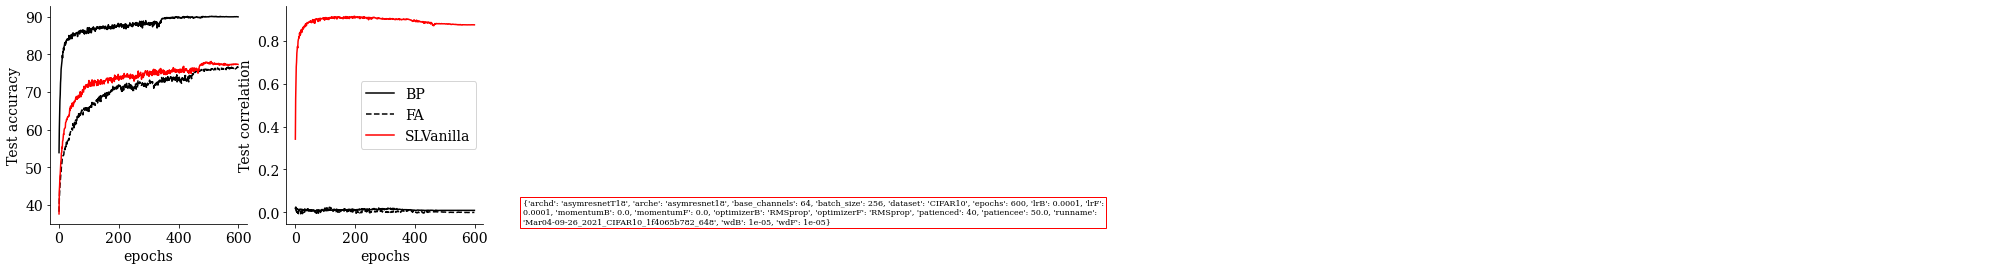

In [15]:

for runname in runnames_list:

    fig, axes = plt.subplots(1,3, figsize=(12,4))
    methods = ['BP', 'FA','SLVanilla','SLError','SLAdvImg','SLAdvCost']
#     colors = {'FA':'k', 'BP':'k', 'SLVanilla':'red', 'SLError':'orange','SLAdvImg':'salmon','SLAdvCost':'maroon'}
#     linestyles = {'FA':'--', 'BP':'-', 'SLVanilla':'-', 'SLError':'-','SLAdvImg':'-','SLAdvCost':'-'}

    colors = {'FA':'k', 'BP':'k', 'SLVanilla':'red'}
    linestyles = {'FA':'--', 'BP':'-', 'SLVanilla':'-'}
    facecolors = {'FA':'white', 'BP':'k', 'SLVanilla':'red'}
    colors_ae = {'FA':'gray', 'BP':'gray'}
    linestyles_ae = {'FA':'--', 'BP':'-'}
    colors_tcae = {'FA':'salmon', 'BP':'salmon'}
    linestyles_tcae = {'FA':'--', 'BP':'-'}


    configs = yaml.safe_load(open(path_prefix + '/Results/Symbio/Symbio/%s/configs.yml'%runname, 'r'))

    configs_selected = {}
    for k,v in configs.items():
        if k in selected_config_keys:
            configs_selected.update({k:v})


    for method in methods:
        p = path_prefix + '/Results/Symbio/Symbio/%s/training_results_%s.csv'%(runname, method)
        if os.path.exists(p):
            df = pd.read_csv(p)
            axes[0].plot(list(df['test_acc']), colors[method], label=method, ls=linestyles[method])
            axes[1].plot(list(df['test_corrd']), colors[method], label=method, ls=linestyles[method])
        pae = path_prefix + '/Results/Symbio/Symbio/%s/training_results_autoencoders_%s.csv'%(runname, method)
        if os.path.exists(pae):
            df_ae = pd.read_csv(pae)
            axes[0].plot(list(df['test_acc']), color=colors_ae[method], 
                       label=method + ' AE', ls=linestyles_ae[method], )

        ptcae = path_prefix + '/Results/Symbio/Symbio/%s/training_results_autoencoders_Twocosts_%s.csv'%(runname, method)
        if os.path.exists(ptcae):
            df_tcae = pd.read_csv(ptcae)
            axes[0].plot(list(df['test_acc']), color=colors_tcae[method], 
                       label=method + ' AE TC', ls=linestyles_tcae[method])
            

    axes[2].set_xticks([])
    axes[2].set_yticks([])
    axes[2].axis('off')
    txt = axes[2].text(0,0, str(configs_selected), wrap=True, fontsize=8,bbox=dict(boxstyle='square', fc='w', ec='r'))
    txt._get_wrap_line_width = lambda : 600

    for ax in [axes[1], axes[0]]:
        ax.patch.set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.tick_params(axis='y',direction='out', right=False)
        plt.tick_params(axis='x',direction='out', top=False)
        ax.set_xlabel('epochs')

    axes[0].set_ylabel('Test accuracy')
    axes[1].set_ylabel('Test correlation')       
    axes[1].legend()
    # plt.tight_layout()

    savedir = path_prefix + '/Results/Symbio/Symbio/%s/'%runname
    if not os.path.exists(savedir):
        os.makedirs(savedir)

    fig.savefig(savedir + 'Test_acc_corrd.png', dpi=200)
    fig.savefig(savedir + 'Test_acc_corrd.pdf', dpi=200)

### Plot Summary Scatter: edit the save name!

Nov04-13-32_CIFAR10_d0236dbe9e_AsymResNetL10Simple_794
 BP : acc= 85.79, corr=0.01 FA : acc= 74.30, corr=-0.02 SLVanilla : acc= 80.51, corr=0.72
Nov04-13-32_CIFAR10_d0236dbe9e_AsymResNetL10Simple_138
 BP : acc= 85.77, corr=-0.01 FA : acc= 73.46, corr=-0.01 SLVanilla : acc= 81.16, corr=0.68
Nov04-13-32_CIFAR10_d0236dbe9e_AsymResNetL10Simple_463
 BP : acc= 86.64, corr=0.01 FA : acc= 73.33, corr=0.01 SLVanilla : acc= 80.82, corr=0.65
Nov04-13-32_CIFAR10_d0236dbe9e_AsymResNetL10Simple_661
 BP : acc= 86.97, corr=0.01 FA : acc= 73.57, corr=0.01 SLVanilla : acc= 81.23, corr=0.66
Nov04-13-32_CIFAR10_d0236dbe9e_AsymResNetL10Simple_599
 BP : acc= 86.62, corr=-0.00 FA : acc= 74.63, corr=-0.01 SLVanilla : acc= 81.50, corr=0.70


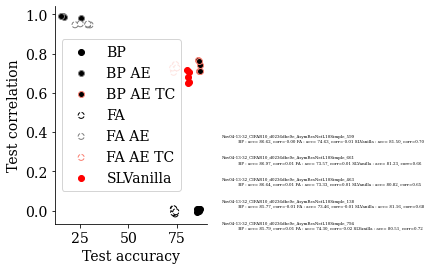

In [55]:

methods = ['BP', 'FA','SLVanilla']
colors = {'FA':'k', 'BP':'k', 'SLVanilla':'red'}
linestyles = {'FA':'--', 'BP':'-', 'SLVanilla':'-'}
facecolors = {'FA':'white', 'BP':'k', 'SLVanilla':'red'}
colors_ae = {'FA':'gray', 'BP':'gray'}
linestyles_ae = {'FA':'--', 'BP':'-'}
colors_tcae = {'FA':'salmon', 'BP':'salmon'}
linestyles_tcae = {'FA':'--', 'BP':'-'}

fig, axes = plt.subplots(1, 2, figsize=(6,4))
c = 0
for r, runname in enumerate(runnames_list):

    
   
    configs = yaml.safe_load(open(path_prefix + '/Results/Symbio/Symbio/%s/configs.yml'%runname, 'r'))

    configs_selected = {}
    for k,v in configs.items():
        if k in selected_config_keys:
            configs_selected.update({k:v})

    res = runname
    txt = axes[1].text(-0.1,r/10, res, wrap=True, fontsize=4)
    print(res)
    res = ''
    for method in methods:
        
        c += 1
        p = path_prefix + '/Results/Symbio/Symbio/%s/training_results_%s.csv'%(runname, method)
        if os.path.exists(p):
            df = pd.read_csv(p)
            axes[0].scatter(list(df['test_acc'])[-1], list(df['test_corrd'])[-1], edgecolor=colors[method], 
                       label=method, ls=linestyles[method], facecolors=facecolors[method])
        
        
        
        pae = path_prefix + '/Results/Symbio/Symbio/%s/training_results_autoencoders_%s.csv'%(runname, method)
        if os.path.exists(pae):
            df_ae = pd.read_csv(pae)
            axes[0].scatter(list(df_ae['test_acc'])[-1], list(df_ae['test_corrd'])[-1], edgecolor=colors_ae[method], 
                       label=method + ' AE', ls=linestyles_ae[method], facecolors=facecolors[method])
        
        ptcae = path_prefix + '/Results/Symbio/Symbio/%s/training_results_autoencoders_Twocosts_%s.csv'%(runname, method)
        if os.path.exists(ptcae):
            df_tcae = pd.read_csv(ptcae)
            axes[0].scatter(list(df_tcae['test_acc'])[-1], list(df_tcae['test_corrd'])[-1], edgecolor=colors_tcae[method], 
                       label=method + ' AE TC', ls=linestyles_tcae[method], facecolors=facecolors[method])
            
        if c == 3:
            axes[0].legend()
        res += ' %s : acc= %.2f, corr=%.2f'% (method, list(df['test_acc'])[-1], list(df['test_corrd'])[-1])
    print(res)

    txt = axes[1].text(0,r/10-0.02 , res, wrap=True, fontsize=4)
#     txt._get_wrap_line_width = lambda : 600

axes[0].patch.set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
plt.tick_params(axis='y',direction='out', right=False)
plt.tick_params(axis='x',direction='out', top=False)


axes[0].set_xlabel('Test accuracy')
axes[0].set_ylabel('Test correlation')       

axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].axis('off')

savedir = path_prefix + '/Results/Symbio/summary/'
if not os.path.exists(savedir):
    os.makedirs(savedir)

# fig.savefig(savedir + 'scatter_AsymResNetL_TwoCostAEcontrolMNISTCorrSchedul.png', dpi=200)
# fig.savefig(savedir + 'scatter_AsymResNetL_TwoCostAEcontrolMNISTCorrSchedul.pdf', dpi=200)

# fig.savefig(savedir + 'scatter_asymresnet_asymresnet18_893.png', dpi=200)
# fig.savefig(savedir + 'scatter_asymresnet_asymresnet18_893.pdf', dpi=200)

fig.savefig(savedir + 'scatter_AsymResNetL10Simple.png', dpi=200)
fig.savefig(savedir + 'scatter_AsymResNetL10Simple.pdf', dpi=200)

## read json results files

In [64]:

def get_measure_dicts_json(hashname_disc, n_epochs_disc):
#     fig, ax = plt.subplots(1,1, figsize=(5,3.5))
    #'RMSpropRMSpropMNISTAsymResLNet10' #'RMSpropRMSpropMNISTFullyConn' ##'RMSpropRMSpropMNISTFullyConnE150'
    # 'RMSpRMSpMNISTAsymResLNet10BNaffine'
    methods = ['SLVanilla','BP', 'FA']
    colors = {'FA':'k', 'BP':'k', 'SLVanilla':'red'}
    linestyles = {'FA':'--', 'BP':'-', 'SLVanilla':'-'}
    if 'AsymResLNet' in hashname:
        markers = {'FA':'o', 'BP':'o', 'SLVanilla':'o'}
    elif 'FullyConn' in hashname:
        markers = {'FA':'s', 'BP':'s', 'SLVanilla':'s'}

    facecolors = {'FA':'none', 'BP':'k', 'SLVanilla':'red'}

    with open(path_prefix + '/Results/Symbio/runswithhash/%s.txt'%hashname_disc) as f:
        Lines = f.readlines() 

    valid_runnames = []
#     fig, ax = plt.subplots(1,1, figsize=(12,8))
    for l in Lines:
        runname = l.strip('\n')

        configs = yaml.safe_load(open(resultsdir + '/%s/configs.yml'%runname, 'r'))
        list_json_paths = []
        for method in methods:
            p = resultsdir + '/%s/run_json_dict_%s.json'%(runname, method)
            if os.path.exists(p):
                
                with open(p,"r") as jfile:
                    dj = json.load(jfile)
                
                if len(dj['Test_acce']) >= n_epochs_disc: #configs['epochs']:
                    list_json_paths.append(p)
                else:
                    print(len(dj['Test_acce']),n_epochs_disc, configs['epochs'])
                    
        
        if len(list_json_paths) == len(methods):
            valid_runnames.append(runname)
            configs = yaml.safe_load(open(resultsdir + '/%s/configs.yml'%runname, 'r'))
        else:
            print(list_json_paths)

    print('number of valid runs discriminative',len(valid_runnames))

#     n_pochs = 370 #configs['epochs']
    arch =  configs['arche'][:-1]

    test_init = np.zeros((len(valid_runnames),n_epochs_disc))
    test_acc_dict = {}
    test_corrd_dict = {}
    test_lossd_dict = {}
    for method in methods:
        test_acc_dict[method] = copy.deepcopy(test_init)
        test_corrd_dict[method] = copy.deepcopy(test_init)
        test_lossd_dict[method] = copy.deepcopy(test_init)

    for r, runname in enumerate(valid_runnames):
        configs = yaml.safe_load(open(path_prefix + '/Results/Symbio/Symbio/%s/configs.yml'%runname, 'r'))

        for method in methods:
            p = resultsdir + '%s/run_json_dict_%s.json'%(runname, method)
            with open(p,"r") as jfile:
                dj = json.load(jfile)
            label = method 
#             ax.plot(dj['lrF'], label=label, color=colors[method], ls=linestyles[method])
            test_acc_dict[method][r] = dj['Test_acce'][0:n_epochs_disc]
            test_corrd_dict[method][r] = dj['Test_corrd'][0:n_epochs_disc]
            test_lossd_dict[method][r] = dj['Test_lossd'][0:n_epochs_disc]
    return test_acc_dict, test_corrd_dict, test_lossd_dict, configs, valid_runnames




def get_measure_dicts_ae_json(hashname_ae, n_epochs_ae):
    #'RMSpropRMSpropMNISTAsymResLNet10' #'RMSpropRMSpropMNISTFullyConn' ##'RMSpropRMSpropMNISTFullyConnE150'
    # 'RMSpRMSpMNISTAsymResLNet10BNaffine'
#     fig, ax = plt.subplots(1,1, figsize=(5,3.5))
    methods = ['BP', 'FA']
    colors = {'FA':'k', 'BP':'k'}
    linestyles = {'FA':'--', 'BP':'-'}

    with open(path_prefix + '/Results/Symbio/runswithhash/%s.txt'%hashname_ae) as f:
        Lines = f.readlines() 

    valid_runnames = []
#     fig, ax = plt.subplots(1,1, figsize=(12,8))
    for l in Lines:
        runname = l.strip('\n')

        configs = yaml.safe_load(open(resultsdir + '/%s/configs.yml'%runname, 'r'))
        list_json_paths = []
        for method in methods:
            p = resultsdir + '/%s/run_json_dict_autoencoder_%s.json'%(runname, method)
            if os.path.exists(p):
                
                with open(p,"r") as jfile:
                    dj = json.load(jfile)
                
                if len(dj['Test_acce']) >= n_epochs_ae: #configs['epochs']:
                    list_json_paths.append(p)
                else:
                    print('auto',len(dj['Test_acce']), n_epochs_ae, configs['epochs'])
                    
        
        if len(list_json_paths) == len(methods):
            valid_runnames.append(runname)
            configs = yaml.safe_load(open(path_prefix + '/Results/Symbio/Symbio/%s/configs.yml'%runname, 'r'))

    print('number of valid runs autoencoder',len(valid_runnames))

#     n_pochs = 370 #configs['epochs']
    arch =  configs['arche'][:-1]

    test_init = np.zeros((len(valid_runnames),n_epochs_ae))
    test_acc_dict = {}
    test_corrd_dict = {}
    test_lossd_dict = {}
    for method in methods:
        test_acc_dict[method] = copy.deepcopy(test_init)
        test_corrd_dict[method] = copy.deepcopy(test_init)
        test_lossd_dict[method] = copy.deepcopy(test_init)

    for r, runname in enumerate(valid_runnames):
        configs = yaml.safe_load(open(resultsdir + '/%s/configs.yml'%runname, 'r'))

        for method in methods:
            p = resultsdir + '/%s/run_json_dict_autoencoder_%s.json'%(runname, method)
            with open(p,"r") as jfile:
                dj = json.load(jfile)
            label = method 
#             ax.plot(dj['lrF'], label=label, color=colors[method], ls=linestyles[method])
            test_acc_dict[method][r] = dj['Test_acce'][0:n_epochs_ae]
            test_corrd_dict[method][r] = dj['Test_corrd'][0:n_epochs_ae]
            test_lossd_dict[method][r] = dj['Test_lossd'][0:n_epochs_ae]
            if method == 'FA' and np.all(test_corrd_dict[method][r]<0.9):
                print('inja',runname, len(dj['Test_corrd']))
    return test_acc_dict, test_corrd_dict, test_lossd_dict, configs, valid_runnames









In [87]:
#'RMSpropRMSpropMNISTAsymResLNet10' #'RMSpropRMSpropMNISTFullyConn' ##'RMSpropRMSpropMNISTFullyConnE150'
    # 'RMSpRMSpMNISTAsymResLNet10BNaffine'
    
hashname= 'asymresnet18_893' #'hypsaymresnet18lr' #'hypsaymresnet18mtm' #'hypsaymresnet18lr'  #'hypsaymresnet18mtm'
#'hypersearchsimplemodules' #'TwoCostAEcontrolMNIST'  #'hypersearchRMSprop'
#'RMSpropRMSpropMNISTFullyConnE150' #'RMSpRMSpMNISTAsymResLNet10BNaffine2' #'RMSpropRMSpropMNISTFullyConnE150' #'RMSpRMSpMNISTAsymResLNet10BNaffine2'



#****MNIST****
# 'RMSpRMSpMNISTAsymResLNet10BNaffine2'
# 'RMSpRMSpMNISTAsymResLNet10BNaff3'

#****CIFAR10*******
#'RMSpCIFAR10AsymResLNet10BNaff'

#***'Fashion MNIST****'
#'RMSpRMSpFaMNISTAsymResLNet10BNaff' # 'RMSpRMSpFaMNISTAsymResLNet10BNaffPtnc30' #'FaMNISTAsymResLNet10BNaff' 

#'MNISTAsymResLNet10BNaffPatience30'
#'RMSpRMSpFaMNISTAsymResLNet10BNaffPtnc30' #'RMSpRMSpMNISTAsymResLNet10BNaff3' # #'RMSpRMSpMNISTAsymResLNet10BNaff3' #'RMSpRMSpMNISTAsymResLNet10BNaffine2'
#'RMSpRMSpFaMNISTAsymResLNet10BNaffPtnc30'#'RMSpRMSpFaMNISTAsymResLNet10BNaff' #'RMSpCIFAR10AsymResLNet10BNaff'     #'FaMNISTAsymResLNet10BNaff' #'RMSpRMSpMNISTAsymResLNet10BNaff3'


#'RMSpRMSpFaMNISTAsymResLNet10BNaff' # 'RMSpRMSpMNISTAsymResLNet10BNaffine'
#'RMSpRMSpFaMNISTAsymResLNet10BNaff' #'RMSpRMSpMNISTAsymResLNet10BNaffine'
n_epochs = 400
n_epochs_ae = 400
test_acc_dict, test_corrd_dict, test_lossd_dict, configs, valid_runnames = get_measure_dicts_json(hashname, n_epochs)
test_acc_dict_ae, test_corrd_dict_ae, test_lossd_dict_ae, configs_ae, valid_runnames_ae = get_measure_dicts_ae_json(hashname, n_epochs_ae)

number of valid runs discriminative 5
number of valid runs autoencoder 5


number of valid runs discriminative 5
number of valid runs autoencoder 5
method SLVanilla 78.476
method BP 89.704
autoencoder acc BP 35.938
method FA 74.69
autoencoder acc FA 27.734
method SLVanilla 0.883
method BP 0.012
autoencoder corr BP 0.991
method FA 0.01
autoencoder corr FA 0.949
asymresnet18_893 PatienceF: 50.0 PatienceB: 40


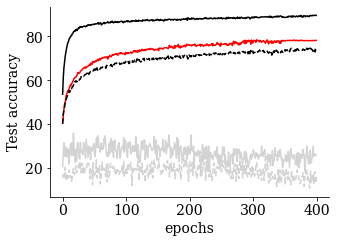

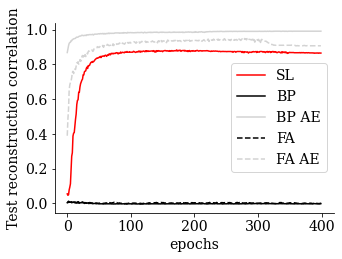

In [90]:

hashname= 'asymresnet18_893' #'hypsaymresnet18mtm' #'hypersearchsimplemodules'# 'hypersearchRMSpropNoBN'  # 'TwoCostAEcontrolMNIST'#'hypersearchRMSprop' #
#'RMSpRMSpMNISTAsymResLNet10BNaffine2' #'RMSpRMSpMNISTAsymResLNet10BNaffine2'


# 'MNISTAsymResLNet10BNaffPatience30'
#'RMSpRMSpMNISTAsymResLNet10BNaff3'

#'RMSpCIFAR10AsymResLNet10BNaff'


#'RMSpRMSpFaMNISTAsymResLNet10BNaff'  'RMSpRMSpFaMNISTAsymResLNet10BNaffPtnc30' #'FaMNISTAsymResLNet10BNaff' 


#'RMSpRMSpFaMNISTAsymResLNet10BNaffPtnc30' #'RMSpRMSpMNISTAsymResLNet10BNaff3' #'RMSpRMSpMNISTAsymResLNet10BNaffine'
#'RMSpRMSpFaMNISTAsymResLNet10BNaff' #'RMSpRMSpMNISTAsymResLNet10BNaff3' #'RMSpRMSpFaMNISTAsymResLNet10BNaff' # 'RMSpRMSpMNISTAsymResLNet10BNaffine' 


n_epochs = 400  #300#800#200#300#370
n_epochs_ae = 400  #300#500#200#300

#'RMSpropRMSpropMNISTAsymResLNet10' #'RMSpropRMSpropMNISTFullyConn' ##'RMSpropRMSpropMNISTFullyConnE150'
    # 'RMSpRMSpMNISTAsymResLNet10BNaffine'
    #'RMSpRMSpMNISTAsymResLNet10BNaffine'




test_acc_dict, test_corrd_dict, test_lossd_dict, configs, valid_runnames = get_measure_dicts_json(hashname, n_epochs)
test_acc_dict_ae, test_corrd_dict_ae, test_lossd_dict_ae, configs, valid_runnames_ae = get_measure_dicts_ae_json(hashname, n_epochs_ae)

arch =  configs['arche'][:-1]

methods = ['SLVanilla', 'BP','FA']
colors = {'FA':'k', 'BP':'k', 'SLVanilla':'red'}
method_labels = {'FA':'FA', 'BP':'BP', 'SLVanilla':'SL'}
linestyles = {'FA':'--', 'BP':'-', 'SLVanilla':'-'}

# Test Acc
fig, ax = plt.subplots(1,1, figsize=(5,3.5))
for method in methods:
    # plot discriminative
    measure = test_acc_dict
    ax.plot(range(n_epochs ), np.median(measure[method], 0), colors[method], label=method_labels[method], ls=linestyles[method])
#     ax.fill_between(range(n_epochs ), np.median(measure[method], 0)-measure[method].std(0),
#                     np.median(measure[method], 0)+measure[method].std(0),
#                     alpha=0.1, color=colors[method], ls=linestyles[method])
    print('method',method, max(np.median(measure[method],0)))
    
    if method in ['FA','BP']:
        # plot autoencoders
        measure = test_acc_dict_ae
        ax.plot(range(n_epochs_ae ), np.median(measure[method], 0), 'lightgray', label=method_labels[method] + ' AE', ls=linestyles[method])
#         ax.fill_between(range(n_epochs ), np.median(measure[method], 0)-measure[method].std(0),
#                         np.median(measure[method], 0)+measure[method].std(0),
#                         alpha=0.1, color='gray', ls=linestyles[method])
        print('autoencoder acc',method, max(np.median(measure[method],0)))
        
    
ax = plt.gca()
ax.patch.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(axis='y',direction='out', right=False)
plt.tick_params(axis='x',direction='out', top=False)
ax.set_xlabel('epochs')
ax.set_ylabel('Test accuracy')
# ax.legend(loc='center right')

# ax.set_title('%s %s (%s)'%(configs['dataset'], arch, hashname))

savedir = path_prefix + '/Results/Symbio/runswithhash/%s/'%hashname
if not os.path.exists(savedir):
    os.makedirs(savedir)

fig.savefig(savedir + '5lineplots_Testacc_%s.png'%(hashname), dpi=200)
fig.savefig(savedir + '5lineplots_Testacc_%s.pdf'%(hashname), dpi=200)


# ax.set_title('Convolutional architecture on %s'%configs['dataset'])


savedir = path_prefix + '/Results/Symbio/runswithhash/Final/'
if not os.path.exists(savedir):
    os.makedirs(savedir)
    
fig.savefig(savedir + '5lineplots_Testacc_%s.png'%(hashname), dpi=200)
fig.savefig(savedir + '5lineplots_Testacc_%s.pdf'%(hashname), dpi=200)
#-------------------------------------------------------------------------------

# Test correlation
fig, ax = plt.subplots(1,1, figsize=(5,3.5))
for method in methods:
    # plot discriminative
    measure = test_corrd_dict
    ax.plot(range(n_epochs ), np.median(measure[method], 0), colors[method], label=method_labels[method], ls=linestyles[method])
#     ax.fill_between(range(n_epochs ), np.median(measure[method], 0)-measure[method].std(0),
#                     np.median(measure[method], 0)+measure[method].std(0),
#                     alpha=0.1, color=colors[method], ls=linestyles[method])
    print('method',method, max(np.median(measure[method],0)))
    
    if method in ['FA','BP']:
        # plot autoencoders
        measure = test_corrd_dict_ae
        ax.plot(range(n_epochs_ae ), np.median(measure[method], 0), 'lightgray', label=method_labels[method] + ' AE', ls=linestyles[method])
#         ax.fill_between(range(n_epochs ), np.median(measure[method], 0)-measure[method].std(0),
#                         np.median(measure[method], 0)+measure[method].std(0),
#                         alpha=0.1, color='gray', ls=linestyles[method])
        print('autoencoder corr',method, max(np.median(measure[method],0)))
        
    
ax = plt.gca()
ax.patch.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(axis='y',direction='out', right=False)
plt.tick_params(axis='x',direction='out', top=False)
ax.set_xlabel('epochs')
ax.set_ylabel('Test reconstruction correlation')
ax.legend(loc='center right')

# ax.set_title('%s %s (%s)'%(configs['dataset'], arch, hashname))
# plt.tight_layout()

savedir = path_prefix + '/Results/Symbio/runswithhash/%s/'%hashname
if not os.path.exists(savedir):
    os.makedirs(savedir)
    
fig.savefig(savedir + '5lineplots_Testcorrd_%s.png'%(hashname), dpi=200)
fig.savefig(savedir + '5lineplots_Testcorrd_%s.pdf'%(hashname), dpi=200)


# ax.set_title('Convolutional architecture on %s'%configs['dataset'])



savedir = path_prefix + '/Results/Symbio/runswithhash/%s/'%hashname
if not os.path.exists(savedir):
    os.makedirs(savedir)
    
fig.savefig(savedir + '5lineplots_Testcorrd_%s.png'%(hashname), dpi=200)
fig.savefig(savedir + '5lineplots_Testcorrd_%s.pdf'%(hashname), dpi=200)
print(hashname, 'PatienceF:',configs['patiencee'],'PatienceB:',configs['patienced'])

In [33]:
test_acc_dict['SLVanilla'][:,-1]


array([79.397, 79.477, 78.816, 78.435])

In [34]:
test_acc_dict['SLVanilla'][:,-1] - test_acc_dict['FA'][:,-1]

array([5.288, 5.979, 6.22 , 5.258])

In [35]:
test_acc_dict['BP'][:,-1]

array([92.929, 92.408, 92.618, 92.568])

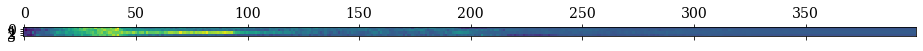

In [36]:
plt.matshow(test_acc_dict['SLVanilla']-test_acc_dict['FA'])

In [28]:
valid_runnames

['Oct16-21-27_CIFAR10_34deb8d3eb_hypersearchRMSprop_696',
 'Oct16-21-27_CIFAR10_34deb8d3eb_hypersearchRMSprop_306',
 'Oct16-21-27_CIFAR10_34deb8d3eb_hypersearchRMSprop_475',
 'Oct16-21-27_CIFAR10_34deb8d3eb_hypersearchRMSprop_89',
 'Oct16-21-27_CIFAR10_34deb8d3eb_hypersearchRMSprop_289',
 'Oct16-21-27_CIFAR10_34deb8d3eb_hypersearchRMSprop_790',
 'Oct16-21-27_CIFAR10_34deb8d3eb_hypersearchRMSprop_123',
 'Oct16-21-27_CIFAR10_34deb8d3eb_hypersearchRMSprop_682',
 'Oct16-21-27_CIFAR10_34deb8d3eb_hypersearchRMSprop_972',
 'Oct16-21-27_CIFAR10_34deb8d3eb_hypersearchRMSprop_177',
 'Oct16-21-27_CIFAR10_34deb8d3eb_hypersearchRMSprop_294',
 'Oct16-21-28_CIFAR10_34deb8d3eb_hypersearchRMSprop_471']

# Scatters using jsons

number of valid runs discriminative 5
number of valid runs autoencoder 5
Convolutional
asymresnet18_893


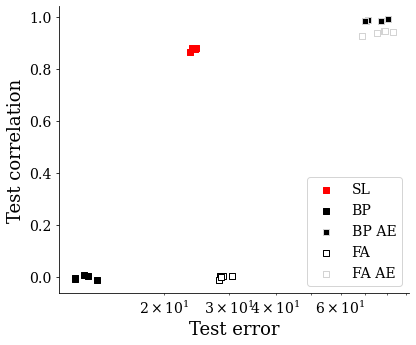

In [99]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

markers = {'Convolutional':'s'}

hashname = 'asymresnet18_893'
#'RMSpRMSpMNISTAsymResLNet10BNaffine2' #'RMSpRMSpMNISTAsymResLNet10BNaff3' #'RMSpRMSpMNISTAsymResLNet10BNaffine' #'RMSpRMSpMNISTAsymResLNet10BNaff3' #'RMSpRMSpMNISTAsymResLNet10BNaffine2' #'RMSpRMSpMNISTAsymResLNet10BNaffine' #



fig, ax = plt.subplots(1,1, figsize=(6,5))

arch_type ='Convolutional'
colors = {'FA':'k', 'BP':'k', 'SLVanilla':'red'}
facecolors = {'FA':'white', 'BP':'k', 'SLVanilla':'red'}
linestyles = {'FA':'--', 'BP':'-', 'SLVanilla':'-'}

methods = ['SLVanilla', 'BP','FA']
method_labels = {'FA':'FA', 'BP':'BP', 'SLVanilla':'SL'}

hash_arch_type = hashname
n_epochs, n_epochs_ae = 200, 200
arch_label = 'Conv'

test_acc_dict, test_corrd_dict, test_lossd_dict, configs,_ = get_measure_dicts_json(hash_arch_type, n_epochs)
test_acc_dict_ae, test_corrd_dict_ae, test_lossd_dict_ae, _,_ = get_measure_dicts_ae_json(hash_arch_type, n_epochs_ae)


#     fig, ax = plt.subplots(1,1, figsize=(5,5))

for method in methods:

    x = 100-test_acc_dict[method][:,-1] #.max(1)#
    y = test_corrd_dict[method][:,-1] #.max(1)
    ax.scatter(x, y, s=40, edgecolor=colors[method],facecolor=facecolors[method],
               marker=markers[arch_type], label='%s'%(method_labels[method]))
#         confidence_ellipse(x, y, ax, edgecolor=colors[method], ls=linestyles[method])


    if method !='SLVanilla':


        y = test_corrd_dict_ae[method][:,-1] #.max(1)#
        x = 100-test_acc_dict_ae[method][:,-1]#.max(1)

        ax.scatter(x, y, s=40, edgecolor='lightgray', facecolor=facecolors[method],
                   marker=markers[arch_type], label='%s'%(method_labels[method]) + ' AE')
#             confidence_ellipse(x, y, ax, edgecolor='lightgray', ls=linestyles[method])




ax = plt.gca()
ax.patch.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(axis='y',direction='out', right=False)
plt.tick_params(axis='x',direction='out', top=False)
ax.set_xlabel('Test error', fontsize=18)
ax.set_ylabel('Test correlation', fontsize=18)
#     ax.set_title('%s %s'%(arch_type, configs['dataset']))
plt.tight_layout()


plt.xscale('log')
#     plt.yscale('log')
#     plt.grid(True, which="both", ls="-", color='lightblue')
# plt.gca().invert_xaxis()


print(arch_type)
print(hash_arch_type)

ax.legend(loc='lower right',bbox_to_anchor=(1.0, 0),ncol=1, )#labelspacing=0.05
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)


savedir = path_prefix + '/Results/Symbio/runswithhash/%s/'%hashname
if not os.path.exists(savedir):
    os.makedirs(savedir)
fig.savefig(savedir + 'cloudscatter_wAE_both_%s.png'%(hashname), dpi=200)
fig.savefig(savedir + 'cloudscatter_wAE_both_%s.pdf'%(hashname), dpi=200)



number of valid runs discriminative 5
number of valid runs autoencoder 5
customized
AsymResNetL10Simple
number of valid runs discriminative 5
number of valid runs autoencoder 5
resnet18
asymresnet18_893


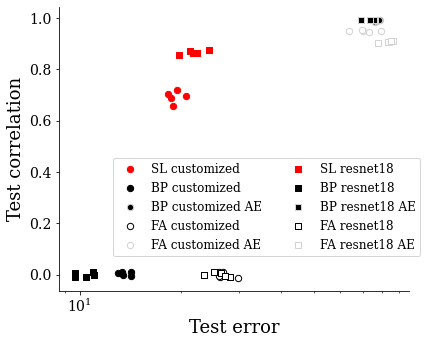

In [78]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

markers = {'customized':'o', 'resnet18':'s'}

hash_1 = 'AsymResNetL10Simple'
hash_2  = 'asymresnet18_893'



fig, ax = plt.subplots(1,1, figsize=(6,5))

for arch_type in ['customized', 'resnet18']:
    colors = {'FA':'k', 'BP':'k', 'SLVanilla':'red'}
    facecolors = {'FA':'white', 'BP':'k', 'SLVanilla':'red'}
    linestyles = {'FA':'--', 'BP':'-', 'SLVanilla':'-'}

    methods = ['SLVanilla', 'BP','FA']
    method_labels = {'FA':'FA', 'BP':'BP', 'SLVanilla':'SL'}
    #'RMSpropRMSpropMNISTAsymResLNet10' #'RMSpropRMSpropMNISTFullyConn' ##'RMSpropRMSpropMNISTFullyConnE150'
        # 'RMSpRMSpMNISTAsymResLNet10BNaffine'
    if arch_type =='customized':
        hash_arch_type = hash_1
        n_epochs, n_epochs_ae = 400, 400
        arch_label = 'customized'
    elif arch_type == 'resnet18':
        hash_arch_type = hash_2 
        n_epochs, n_epochs_ae = 400, 400
        arch_label = 'resnet18'
    test_acc_dict, test_corrd_dict, test_lossd_dict, configs, _ = get_measure_dicts_json(hash_arch_type, n_epochs)
    test_acc_dict_ae, test_corrd_dict_ae, test_lossd_dict_ae, _, _ = get_measure_dicts_ae_json(hash_arch_type, n_epochs_ae)


#     fig, ax = plt.subplots(1,1, figsize=(5,5))

    for method in methods:
               
        x = 100-test_acc_dict[method][:,-1] #.max(1)#
        y = test_corrd_dict[method][:,-1] #.max(1)
        ax.scatter(x, y, s=40, edgecolor=colors[method],facecolor=facecolors[method],
                   marker=markers[arch_type], label='%s %s'%(method_labels[method],arch_label))
#         confidence_ellipse(x, y, ax, edgecolor=colors[method], ls=linestyles[method])


        if method !='SLVanilla':


            y = test_corrd_dict_ae[method][:,-1] #.max(1)#
            x = 100-test_acc_dict_ae[method][:,-1]#.max(1)

            ax.scatter(x, y, s=40, edgecolor='lightgray', facecolor=facecolors[method],
                       marker=markers[arch_type], label='%s %s'%(method_labels[method],arch_label) + ' AE')
#             confidence_ellipse(x, y, ax, edgecolor='lightgray', ls=linestyles[method])




    ax = plt.gca()
    ax.patch.set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.tick_params(axis='y',direction='out', right=False)
    plt.tick_params(axis='x',direction='out', top=False)
    ax.set_xlabel('Test error', fontsize=18)
    ax.set_ylabel('Test correlation', fontsize=18)
#     ax.set_title('%s %s'%(arch_type, configs['dataset']))
    plt.tight_layout()


    plt.xscale('log')
#     plt.yscale('log')
#     plt.grid(True, which="both", ls="-", color='lightblue')
    # plt.gca().invert_xaxis()

    
    print(arch_type)
    print(hash_arch_type)

ax.legend(loc='lower right',bbox_to_anchor=(1.05, 0.1),ncol=2,fontsize=12 )#labelspacing=0.05
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)


savedir = path_prefix + '/Results/Symbio/summary/'
if not os.path.exists(savedir):
    os.makedirs(savedir)
fig.savefig(savedir + 'cloudscatter_wAE_both_%s_%s.png'%(hash_1, hash_2), dpi=200)
fig.savefig(savedir + 'cloudscatter_wAE_both_%s_%s.pdf'%(hash_1, hash_2), dpi=200)



164 200 200
['/home/tt2684/Research/Results/Symbio/Symbio//Oct07-11-36_MNIST_8bef0c74ea_RMSpRMSpMNISTAsymResLNet10BNaffine2_252/run_json_dict_BP.json', '/home/tt2684/Research/Results/Symbio/Symbio//Oct07-11-36_MNIST_8bef0c74ea_RMSpRMSpMNISTAsymResLNet10BNaffine2_252/run_json_dict_FA.json']
152 200 200
['/home/tt2684/Research/Results/Symbio/Symbio//Oct07-11-37_MNIST_8bef0c74ea_RMSpRMSpMNISTAsymResLNet10BNaffine2_594/run_json_dict_BP.json', '/home/tt2684/Research/Results/Symbio/Symbio//Oct07-11-37_MNIST_8bef0c74ea_RMSpRMSpMNISTAsymResLNet10BNaffine2_594/run_json_dict_FA.json']
143 200 200
['/home/tt2684/Research/Results/Symbio/Symbio//Oct07-11-37_MNIST_8bef0c74ea_RMSpRMSpMNISTAsymResLNet10BNaffine2_272/run_json_dict_BP.json', '/home/tt2684/Research/Results/Symbio/Symbio//Oct07-11-37_MNIST_8bef0c74ea_RMSpRMSpMNISTAsymResLNet10BNaffine2_272/run_json_dict_FA.json']
127 200 200
['/home/tt2684/Research/Results/Symbio/Symbio//Oct07-11-37_MNIST_8bef0c74ea_RMSpRMSpMNISTAsymResLNet10BNaffine2_796

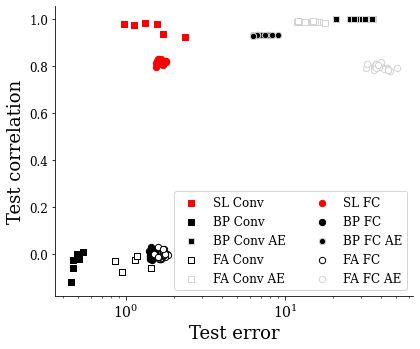

In [86]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

markers = {'FullyConnected':'o', 'Convolutional':'s'}

hash_conv = 'RMSpRMSpMNISTAsymResLNet10BNaffine2' #'RMSpRMSpMNISTAsymResLNet10BNaff3' #'RMSpRMSpMNISTAsymResLNet10BNaffine' #'RMSpRMSpMNISTAsymResLNet10BNaff3' #'RMSpRMSpMNISTAsymResLNet10BNaffine2' #'RMSpRMSpMNISTAsymResLNet10BNaffine' #
hash_fc  = 'RMSpropRMSpropMNISTFullyConnE150'



fig, ax = plt.subplots(1,1, figsize=(6,5))

for arch_type in ['Convolutional', 'FullyConnected']:
    colors = {'FA':'k', 'BP':'k', 'SLVanilla':'red'}
    facecolors = {'FA':'white', 'BP':'k', 'SLVanilla':'red'}
    linestyles = {'FA':'--', 'BP':'-', 'SLVanilla':'-'}

    methods = ['SLVanilla', 'BP','FA']
    method_labels = {'FA':'FA', 'BP':'BP', 'SLVanilla':'SL'}
    #'RMSpropRMSpropMNISTAsymResLNet10' #'RMSpropRMSpropMNISTFullyConn' ##'RMSpropRMSpropMNISTFullyConnE150'
        # 'RMSpRMSpMNISTAsymResLNet10BNaffine'
    if arch_type =='Convolutional':
        hash_arch_type = hash_conv
        n_epochs, n_epochs_ae = 200, 200
        arch_label = 'Conv'
    elif arch_type == 'FullyConnected':
        hash_arch_type = hash_fc 
        n_epochs, n_epochs_ae = 150, 100
        arch_label = 'FC'
    test_acc_dict, test_corrd_dict, test_lossd_dict, configs = get_measure_dicts_json(hash_arch_type, n_epochs)
    test_acc_dict_ae, test_corrd_dict_ae, test_lossd_dict_ae, _ = get_measure_dicts_ae_json(hash_arch_type, n_epochs_ae)


#     fig, ax = plt.subplots(1,1, figsize=(5,5))

    for method in methods:
               
        x = 100-test_acc_dict[method][:,-1] #.max(1)#
        y = test_corrd_dict[method][:,-1] #.max(1)
        ax.scatter(x, y, s=40, edgecolor=colors[method],facecolor=facecolors[method],
                   marker=markers[arch_type], label='%s %s'%(method_labels[method],arch_label))
#         confidence_ellipse(x, y, ax, edgecolor=colors[method], ls=linestyles[method])


        if method !='SLVanilla':


            y = test_corrd_dict_ae[method][:,-1] #.max(1)#
            x = 100-test_acc_dict_ae[method][:,-1]#.max(1)

            ax.scatter(x, y, s=40, edgecolor='lightgray', facecolor=facecolors[method],
                       marker=markers[arch_type], label='%s %s'%(method_labels[method],arch_label) + ' AE')
#             confidence_ellipse(x, y, ax, edgecolor='lightgray', ls=linestyles[method])




    ax = plt.gca()
    ax.patch.set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.tick_params(axis='y',direction='out', right=False)
    plt.tick_params(axis='x',direction='out', top=False)
    ax.set_xlabel('Test error', fontsize=18)
    ax.set_ylabel('Test correlation', fontsize=18)
#     ax.set_title('%s %s'%(arch_type, configs['dataset']))
    plt.tight_layout()


    plt.xscale('log')
#     plt.yscale('log')
#     plt.grid(True, which="both", ls="-", color='lightblue')
    # plt.gca().invert_xaxis()

    
    print(arch_type)
    print(hash_arch_type)

ax.legend(loc='lower right',bbox_to_anchor=(1.0, 0),ncol=2, )#labelspacing=0.05
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)


savedir = path_prefix + '/Results/Symbio/runswithhash/Final/'
if not os.path.exists(savedir):
    os.makedirs(savedir)
fig.savefig(savedir + 'cloudscatter_wAE_both_%s_%s.png'%(hash_conv, hash_fc), dpi=200)
fig.savefig(savedir + 'cloudscatter_wAE_both_%s_%s.pdf'%(hash_conv, hash_fc), dpi=200)



In [90]:
test_corrd_dict_ae[method][:,-1]

array([0.991, 0.99 , 0.991, 0.991, 0.992, 0.991, 0.992, 0.99 , 0.99 ,
       0.99 ])

In [91]:
test_corrd_dict_ae[method].max(1)

array([0.994, 0.994, 0.994, 0.994, 0.995, 0.994, 0.995, 0.994, 0.995,
       0.994])

In [66]:
#https://matplotlib.org/3.3.1/gallery/statistics/confidence_ellipse.html#sphx-glr-gallery-statistics-confidence-ellipse-py
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    
    return ax.add_patch(ellipse)

## Autoencoders

3


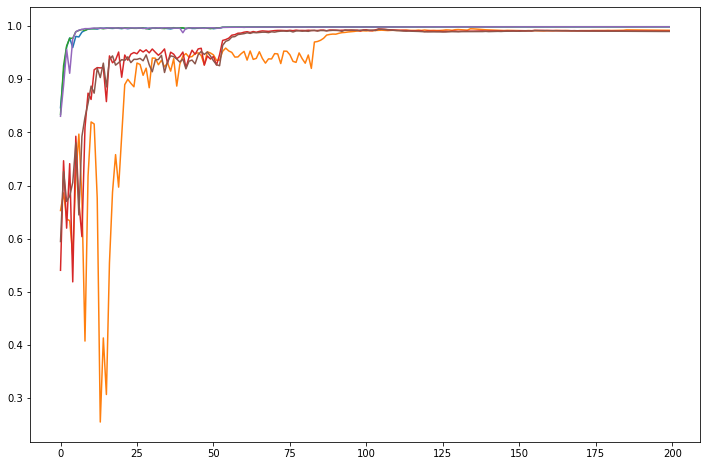

In [12]:
hashname = 'RMSpRMSpMNISTAsymResLNet10BNaffine'
#'RMSpropRMSpropMNISTAsymResLNet10' #'RMSpropRMSpropMNISTAsymResLNet10' #'RMSpropRMSpropMNISTFullyConn' ##'RMSpropRMSpropMNISTFullyConnE150'
methods = ['BP', 'FA']
colors_ae = {'FA':'gray', 'BP':'k'}
linestyles_ae = {'FA':'--', 'BP':'-'}

with open(path_prefix + '/Results/Symbio/runswithhash/%s.txt'%hashname) as f:
    Lines = f.readlines() 

valid_runnames = []
fig, ax = plt.subplots(1,1, figsize=(12,8))
for l in Lines:
    runname = l.strip('\n')
    
    configs = yaml.safe_load(open(path_prefix + '/Results/Symbio/Symbio/%s/configs.yml'%runname, 'r'))
    list_csv_paths = []
    for method in methods:
        p = path_prefix + '/Results/Symbio/Symbio/%s/training_results_autoencoders_%s.csv'%(runname, method)
        if os.path.exists(p):
            df = pd.read_csv(p)
            if len(list(df['test_acc'])) == configs['epochs']:
                list_csv_paths.append(p)
    if len(list_csv_paths) == len(methods):
        valid_runnames.append(runname)
        configs = yaml.safe_load(open(path_prefix + '/Results/Symbio/Symbio/%s/configs.yml'%runname, 'r'))

print(len(valid_runnames))

n_epochs = configs['epochs']
arch =  configs['arche'][:-1]

test_init = np.zeros((len(valid_runnames), n_epochs))
test_acc_dict = {}
test_corrd_dict = {}
test_lossd_dict = {}
for method in methods:
    test_acc_dict[method] = copy.deepcopy(test_init)
    test_corrd_dict[method] = copy.deepcopy(test_init)
    test_lossd_dict[method] = copy.deepcopy(test_init)
    
for r, runname in enumerate(valid_runnames):
    configs = yaml.safe_load(open(path_prefix + '/Results/Symbio/Symbio/%s/configs.yml'%runname, 'r'))
    
    for method in methods:
        p = path_prefix + '/Results/Symbio/Symbio/%s/training_results_autoencoders_%s.csv'%(runname, method)
        df = pd.read_csv(p)
        label = method 
        pl = ax.plot(df['test_corrd'], label=label)
        test_acc_dict[method][r] = list(df['test_acc'])
        test_corrd_dict[method][r] = list(df['test_corrd'])
        test_lossd_dict[method][r] = list(df['test_lossd'])
        

In [274]:
test_acc_dict['BP'].max(1)

array([95.312, 96.094, 95.703, 95.703, 96.484, 95.312, 95.703, 96.094,
       95.703, 94.922])

BP 72.0705
FA 85.8725


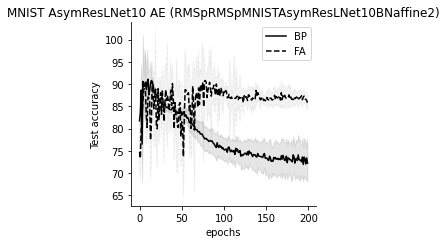

In [116]:
fig, ax = plt.subplots(1,1, figsize=(5,3.5))
measure = test_acc_dict
for method in methods:
    ax.plot(range(n_epochs ), np.median(measure[method], 0), colors[method], label=method, ls=linestyles[method])
    ax.fill_between(range(n_epochs ), np.median(measure[method], 0)-measure[method].std(0),
                    np.median(measure[method], 0)+measure[method].std(0),
                    alpha=0.1, color=colors_ae[method], ls=linestyles_ae[method])
    print(method, measure[method].mean(0)[-1])
    
ax.legend()
ax = plt.gca()
ax.patch.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(axis='y', direction='out', right=False)
plt.tick_params(axis='x', direction='out', top=False)
ax.set_xlabel('epochs')
ax.set_ylabel('Test accuracy')
# ax.set_ylim([95,99])

ax.set_title('%s %s AE (%s)'%(configs['dataset'], arch, hashname))
plt.tight_layout()

# fig.savefig(path_prefix + '/Results/Symbio/runswithhash/%s_test_acc_%s_autoencoders.png'%(hashname, arch), dpi=200)
# fig.savefig(path_prefix + '/Results/Symbio/runswithhash/%s_test_acc_%s_autoencoders.pdf'%(hashname, arch), dpi=200)



BP 0.9989162003784848
FA 0.9894073542795684


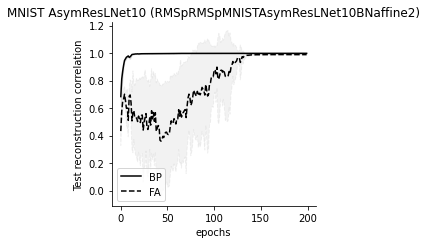

In [118]:
fig, ax = plt.subplots(1,1, figsize=(5,3.5))
measure = test_corrd_dict
for method in methods:
    ax.plot(range(n_epochs ), measure[method].mean(0), colors[method], label=method, ls=linestyles[method])
    ax.fill_between(range(n_epochs ), measure[method].mean(0)-measure[method].std(0),
                    measure[method].mean(0)+measure[method].std(0),
                    alpha=0.1, color=colors_ae[method], ls=linestyles_ae[method])
    print(method, measure[method].mean(0)[-1])
    
ax.legend()
ax = plt.gca()
ax.patch.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(axis='y',direction='out', right=False)
plt.tick_params(axis='x',direction='out', top=False)
ax.set_xlabel('epochs')
ax.set_ylabel('Test reconstruction correlation')

ax.set_title('%s %s (%s)'%(configs['dataset'], arch, hashname))
plt.tight_layout()
# fig.savefig(path_prefix + '/Results/Symbio/runswithhash/%s_test_corrd_%s_autoencoders.png'%(hashname, arch), dpi=200)
# fig.savefig(path_prefix + '/Results/Symbio/runswithhash/%s_test_corrd_%s_autoencoders.pdf'%(hashname, arch), dpi=200)

In [ ]:
getListOfFiles

## Evaluations

In [ ]:
## 

In [17]:
import json
import pandas as pd

measure_name = 'correlation' #'correlation' #'accuracy'

    
if measure_name == 'accuracy':
    measure_key = 'Test_acce'
elif measure_name == 'correlation':
    measure_key = 'Test_corrd'

methods = ['SLVanilla','BP', 'FA']
colors = {'FA':'k', 'BP':'k', 'SLVanilla':'red'}
linestyles = {'FA':'--', 'BP':'-', 'SLVanilla':'-'}
# if 'AsymResLNet' in hashname:
#     markers = {'FA':'o', 'BP':'o', 'SLVanilla':'o'}
# elif 'FullyConn' in hashname:
#     markers = {'FA':'s', 'BP':'s', 'SLVanilla':'s'}

facecolors = {'FA':'none', 'BP':'k', 'SLVanilla':'red'}
method_labels = {'FA':'FA', 'BP':'BP', 'SLVanilla':'SL'}


def get_df_evaluate(runname,measure_name, master_df,master_df_autoencoder,master_df_autoencodertwocosts):
    
    if measure_name == 'accuracy':
        measure_key = 'Test_acce'
    elif measure_name == 'correlation':
        measure_key = 'Test_corrd'
    
    if os.path.exists(resultsdir + '%s/evaluate/'%runname):
        df = pd.DataFrame()
        df_autoencoder = pd.DataFrame()
        df_autoencoder_tc = pd.DataFrame()
        df_dynamic = pd.DataFrame()
        list_files = getListOfFiles(resultsdir + '%s/evaluate/'%runname)
        list_files = [l for l in list_files if '.json' in l]
        
        for l in list_files:
            
            fname = l.split('evaluate/')[1]

            
            with open(l, "r") as jfile:
                try:
                    d = json.load(jfile)
                except UnicodeDecodeError:
                    print(l)
                    d = json.load(jfile)
                    
            if ('autoencoder' not in l) and ('dynamicdecoder' not in l):

                df2 = pd.DataFrame({'method': d['method'],
                         'epsilon':[d['eval_epsilon']],
                         'sigma2':[d['eval_sigma2']],
                         'itr0': [d[measure_key][0]],
                         'itr1': [d[measure_key][1]],
                         'itr2': [d[measure_key][2]],
                         'itr3': [d[measure_key][3]]})
                df = df.append(df2, ignore_index=True)
            elif 'autoencoder_staticdecoder' in l:
                df2_autoencoder = pd.DataFrame({'method': d['method'],
                         'epsilon':[d['eval_epsilon']],
                         'sigma2':[d['eval_sigma2']],
                         'itr0': [d[measure_key][0]],
                         'itr1': [d[measure_key][1]],
                         'itr2': [d[measure_key][2]],
                         'itr3': [d[measure_key][3]]})
                df_autoencoder = df_autoencoder.append(df2_autoencoder, ignore_index=True)
            
            elif 'autoencoder_twocosts_staticdecoder' in l:
                df2_autoencoder_tc = pd.DataFrame({'method': d['method'],
                         'epsilon':[d['eval_epsilon']],
                         'sigma2':[d['eval_sigma2']],
                         'itr0': [d[measure_key][0]],
                         'itr1': [d[measure_key][1]],
                         'itr2': [d[measure_key][2]],
                         'itr3': [d[measure_key][3]]})
                df_autoencoder_tc = df_autoencoder_tc.append(df2_autoencoder_tc, ignore_index=True)
            
#             elif 'dynamicdecoder' in l:
      
#                 df2_dynamic = pd.DataFrame({'method': d['method'],
#                          'epsilon':[d['eval_epsilon']],
#                          'sigma2':[d['eval_sigma2']],
#                          'itr0': [d[measure_key][0]],
#                          'itr1': [d[measure_key][1]],
#                          'itr2': [d[measure_key][2]],
#                          'itr3': [d[measure_key][3]]})
#                 df_dynamic = df_dynamic.append(df2_dynamic, ignore_index=True)
        #if df is not empty
        
    return df, df_autoencoder, df_autoencoder_tc

## By hash

In [56]:
import json
import pandas as pd

measure_name = 'accuracy' #'correlation' #'accuracy'
hashname= 'AsymResNetL10Simple'  #'asymresnet18_893'# 


# 'TwoCostAEcontrolMNISTCorrSchedulBHModu' #'TwoCostAEcontrolMNIST'
#'asymresnet18_893' #'TwoCostAEcontrolMNISTCorrSchedul' #'hypsaymresnet18lr' #'TwoCostAEcontrolMNISTCorrSchedul'
#'TwoCostAEcontrolMNIST'#'hypersearchRMSprop' #
# 'RMSpRMSpMNISTAsymResLNet10BNaffine'#'RMSpRMSpMNISTAsymResLNet10BNaffine' #'RMSpRMSpMNISTAsymResLNet10BNaff3'
# 'RMSpRMSpFaMNISTAsymResLNet10BNaffPtnc30'
# 'RMSpropRMSpropMNISTAsymResLNet10'


with open(path_prefix + '/Results/Symbio/runswithhash/%s.txt'%hashname) as f:
    Lines = f.readlines() 

valid_runnames = {}
valid_runnames_autoencoder = {}
valid_runnames_autoencoder_tc = {}
valid_runnames_dynamic = {}


master_df = pd.DataFrame()
master_df_autoencoder = pd.DataFrame()
master_df_autoencodertwocosts = pd.DataFrame()
master_df_dynamic = pd.DataFrame()
for l in Lines:
    
    runname = l.strip('\n')
    columns = ['method', 'epsilon','sigma', 'itr0','itr1','itr2','itr3']
    
    
    configs = yaml.safe_load(open(resultsdir + '%s/configs.yml'%runname, 'r'))
    list_csv_paths = []
#     print(path_prefix + '/Results/Symbio/Symbio/%s/evaluate/'%runname)
    df, df_autoencoder, df_autoencoder_tc = get_df_evaluate(runname, measure_name,master_df,master_df_autoencoder,master_df_autoencodertwocosts  )
    if len(df.columns)>0:
            
        if np.all([m in list(df['method']) for m in methods]):
                valid_runnames[runname] = runname
                master_df = master_df.append(df)
        # if there are autoencoder runs
        if len(df_autoencoder.columns)>0:
            if np.all([m in list(df_autoencoder['method']) for m in ['FA','BP']]):
                valid_runnames_autoencoder[runname] = runname
                master_df_autoencoder = master_df_autoencoder.append(df_autoencoder)
                
        if len(df_autoencoder_tc.columns)>0:
            if np.all([m in list(df_autoencoder_tc['method']) for m in ['FA','BP']]):
                valid_runnames_autoencoder_tc[runname] = runname
                master_df_autoencodertwocosts = master_df_autoencodertwocosts.append(df_autoencoder_tc)
               # if there are autoencoder runs
#         if len(df_dynamic.columns)>0:
#             if np.all([m in list(df_dynamic['method']) for m in ['FA','BP']]):
#                 valid_runnames_dynamic[runname] = runname
#                 master_df_dynamic = master_df_dynamic.append(df_dynamic)

print(measure_name)
print('number of valid runs',len(valid_runnames))
print('number of valid autoencoder runs',len(valid_runnames_autoencoder))
print('number of valid autoencoder twocosts runs',len(valid_runnames_autoencoder_tc))
# print('number of valid dynamic runs',len(valid_runnames_dynamic))
print('*** make sure the evaluation was done after the training was completed ***')

accuracy
number of valid runs 5
number of valid autoencoder runs 5
number of valid autoencoder twocosts runs 5
*** make sure the evaluation was done after the training was completed ***


In [57]:
df_autoencoder_tc

,method,epsilon,sigma2,itr0,itr1,itr2,itr3
0,FA,0.0,0.901,49.599,33.433,27.524,23.177
1,FA,0.0,0.101,71.404,44.301,34.155,27.985
2,BP,0.0,0.501,66.597,46.354,37.300,31.480
3,FA,0.0,0.301,63.582,41.466,32.712,26.763
4,BP,0.0,0.001,86.418,64.503,50.711,41.747
5,FA,0.0,0.701,52.995,35.226,28.155,23.898
6,BP,0.0,0.101,81.410,58.814,46.615,38.592
7,BP,0.0,0.601,63.562,43.980,35.827,30.058
8,FA,0.0,0.801,51.993,34.105,27.915,23.858
9,BP,0.0,0.201,76.783,54.938,44.020,36.468


In [43]:
df

,method,epsilon,sigma2,itr0,itr1,itr2,itr3
0,BP,0.0,0.801,52.264,10.206,10.056,9.625
1,FA,0.0,0.901,53.075,9.896,10.026,9.896
2,SLVanilla,0.0,0.701,51.042,38.171,31.200,28.085
3,FA,0.8,0.000,42.037,25.936,26.222,25.871
4,SLVanilla,0.0,0.001,79.868,44.952,35.196,30.329
5,SLVanilla,0.0,0.101,73.798,43.450,34.515,29.527
6,BP,0.0,0.401,66.186,10.657,10.146,10.347
7,FA,0.2,0.000,54.006,32.347,32.237,32.001
8,BP,1.0,0.000,37.119,23.738,23.407,23.728
9,BP,0.0,0.201,76.142,10.707,10.136,10.166


## By runnames 

In [23]:
runnames_list = [

# 'Oct26-12-08_CIFAR10_4623412840_469',
    
# 'Oct22-15-24_CIFAR10_4623412840_hypsaymresnet18mtm_917',
# 'Oct22-15-24_CIFAR10_4623412840_hypsaymresnet18mtm_865',
# 'Oct22-15-24_CIFAR10_4623412840_hypsaymresnet18mtm_736',
# 'Oct22-15-25_CIFAR10_4623412840_hypsaymresnet18mtm_881',
    
# 'Oct23-06-38_CIFAR10_4623412840_hypsaymresnet18lr_83',
# 'Oct23-06-38_CIFAR10_4623412840_hypsaymresnet18lr_579',
# 'Oct23-06-38_CIFAR10_4623412840_hypsaymresnet18lr_893',
# 'Oct23-06-38_CIFAR10_4623412840_hypsaymresnet18lr_353',
# 'Oct23-06-38_CIFAR10_4623412840_hypsaymresnet18lr_685',
# 'Oct23-06-38_CIFAR10_4623412840_hypsaymresnet18lr_744',
# 'Oct23-06-38_CIFAR10_4623412840_hypsaymresnet18lr_629',

# 'Oct26-09-07_CIFAR10_4623412840_113',
# 'Oct26-12-08_CIFAR10_4623412840_469',
    
# 'Oct28-11-49_CIFAR10_4623412840_hypsaymresnet18_667',
# 'Oct28-11-49_CIFAR10_4623412840_hypsaymresnet18_431',
# 'Oct28-11-49_CIFAR10_4623412840_hypsaymresnet18_928',
# 'Oct28-11-50_CIFAR10_4623412840_hypsaymresnet18_835',
    
# 'Oct30-14-45_CIFAR10_4d91649eea_aymresnet18_893_948',
# 'Oct30-14-45_CIFAR10_4d91649eea_aymresnet18_893_118',
# 'Oct30-14-46_CIFAR10_4d91649eea_aymresnet18_893_302',
# 'Oct30-14-46_CIFAR10_4d91649eea_aymresnet18_893_210',
'Oct30-14-46_CIFAR10_4d91649eea_aymresnet18_893_286',
    
]

In [29]:

measure_name = 'accuracy' #'correlation' #'accuracy'

valid_runnames = {}
valid_runnames_autoencoder = {}
valid_runnames_autoencoder_tc = {}
valid_runnames_dynamic = {}


master_df = pd.DataFrame()
master_df_autoencoder = pd.DataFrame()
master_df_autoencodertwocosts = pd.DataFrame()
master_df_dynamic = pd.DataFrame()
for runname in runnames_list:
    print(runname)
    columns = ['method', 'epsilon','sigma', 'itr0','itr1','itr2','itr3']
    
    configs = yaml.safe_load(open(resultsdir + '%s/configs.yml'%runname, 'r'))
    list_csv_paths = []
    print(path_prefix + '/Results/Symbio/Symbio/%s/evaluate/'%runname)
    df, df_autoencoder, df_autoencoder_tc = get_df_evaluate(runname, measure_name, master_df,master_df_autoencoder,master_df_autoencodertwocosts  )
    if len(df.columns)>0:
            
        if np.all([m in list(df['method']) for m in methods]):
                valid_runnames[runname] = runname
                master_df = master_df.append(df)
        # if there are autoencoder runs
        if len(df_autoencoder.columns)>0:
            if np.all([m in list(df_autoencoder['method']) for m in ['FA','BP']]):
                valid_runnames_autoencoder[runname] = runname
                master_df_autoencoder = master_df_autoencoder.append(df_autoencoder)
                
        if len(df_autoencoder_tc.columns)>0:
            if np.all([m in list(df_autoencoder_tc['method']) for m in ['FA','BP']]):
                valid_runnames_autoencoder_tc[runname] = runname
                master_df_autoencodertwocosts = master_df_autoencodertwocosts.append(df_autoencoder_tc)
               # if there are autoencoder runs
#         if len(df_dynamic.columns)>0:
#             if np.all([m in list(df_dynamic['method']) for m in ['FA','BP']]):
#                 valid_runnames_dynamic[runname] = runname
#                 master_df_dynamic = master_df_dynamic.append(df_dynamic)

    
print('number of valid runs',len(valid_runnames))
print('number of valid autoencoder runs',len(valid_runnames_autoencoder))
print('number of valid autoencoder twocosts runs',len(valid_runnames_autoencoder_tc))
# print('number of valid dynamic runs',len(valid_runnames_dynamic))
print('*** make sure the evaluation was done after the training was completed ***')

Oct30-14-46_CIFAR10_4d91649eea_aymresnet18_893_286
/home/tt2684/Research/Results/Symbio/Symbio/Oct30-14-46_CIFAR10_4d91649eea_aymresnet18_893_286/evaluate/
number of valid runs 1
number of valid autoencoder runs 1
number of valid autoencoder twocosts runs 1
*** make sure the evaluation was done after the training was completed ***


In [37]:
df

,method,epsilon,sigma2,itr0,itr1,itr2,itr3
0,BP,0.0,0.801,52.264,10.206,10.056,9.625
1,FA,0.0,0.901,53.075,9.896,10.026,9.896
2,SLVanilla,0.0,0.701,51.042,38.171,31.200,28.085
3,FA,0.8,0.000,42.037,25.936,26.222,25.871
4,SLVanilla,0.0,0.001,79.868,44.952,35.196,30.329
5,SLVanilla,0.0,0.101,73.798,43.450,34.515,29.527
6,BP,0.0,0.401,66.186,10.657,10.146,10.347
7,FA,0.2,0.000,54.006,32.347,32.237,32.001
8,BP,1.0,0.000,37.119,23.738,23.407,23.728
9,BP,0.0,0.201,76.142,10.707,10.136,10.166


In [30]:
runname = 'Oct30-14-46_CIFAR10_4d91649eea_aymresnet18_893_286'

## Noise (sigma2)

AsymResNetL10Simple accuracy


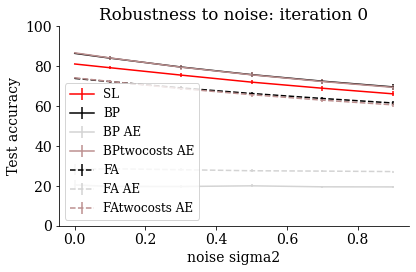

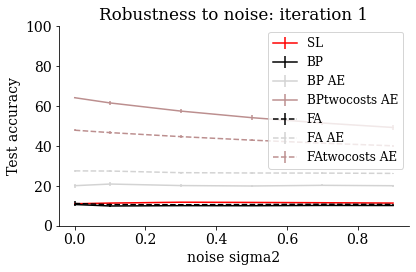

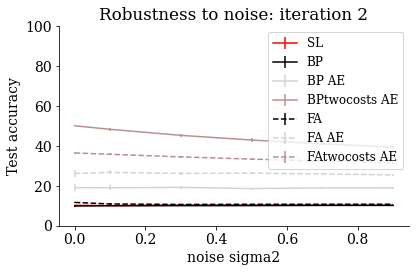

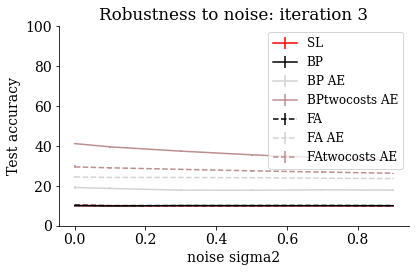

In [62]:
import scipy.stats as ss
 #'BP'#'FA' #'SLVanilla'
facecolors = {'FA':'white', 'SLVanilla':'red', 'BP':'k'}
colors = {'FA':'k', 'BP':'k', 'SLVanilla':'red'}
colors_ae = {'FA':'lightgray', 'BP':'lightgray',}
colors_tcae = {'FA':'rosybrown', 'BP':'rosybrown'}
sigmas = np.unique(master_df['sigma2'])
_, bins = np.histogram(sigmas,5)
sigmas = np.floor(bins*10)/10

for iteration in range(4):
    fig, ax = plt.subplots(1,1)
    for method in ['SLVanilla','BP','FA']:
    
        
        itr_means, itr_sems = [], []
        for j, s in enumerate(sigmas):
            mehtod_selection = master_df['method']==method
            epsilon_selection = master_df['epsilon']==0.0
            sigma2_selection = (master_df['sigma2']-s)<0.01
            itr = master_df[(mehtod_selection & epsilon_selection )& sigma2_selection]['itr%d'%iteration]
    #         ax.bar(j,itr.mean(), edgecolor=colors[method], color = facecolors[method])
    #         ax.errorbar(j,itr.mean(), ss.sem(itr), color='k' )
            itr_means.append(itr.mean())
            itr_sems.append(ss.sem(itr))
        ax.errorbar(sigmas,itr_means, itr_sems, label=method_labels[method], color=colors[method], ls=linestyles[method])
        
        if measure_name == 'accuracy':
            ax.set_ylim([0,100])
        else:
            ax.set_ylim([0,0.95])
#       #  -----autoencoders
        if method in ['FA','BP']:
            itr_means, itr_sems = [], []
            for j, s in enumerate(sigmas):
                method_selection = master_df_autoencoder['method']==method
                epsilon_selection = master_df_autoencoder['epsilon']==0.0
                sigma2_selection = (master_df_autoencoder['sigma2']-s)<0.01
                itr = master_df_autoencoder[(method_selection & epsilon_selection )& sigma2_selection]['itr%d'%iteration]
        #         ax.bar(j,itr.mean(), edgecolor=colors[method], color = facecolors[method])
        #         ax.errorbar(j,itr.mean(), ss.sem(itr), color='k' )
                itr_means.append(itr.mean())
                itr_sems.append(ss.sem(itr))
            ax.errorbar(sigmas,itr_means, itr_sems, label=method_labels[method]+' AE', color=colors_ae[method], ls=linestyles[method])
        
        #  -----autoencoders two costs
        if method in ['FA','BP']:
            itr_means, itr_sems = [], []
            for j, s in enumerate(sigmas):
                method_selection = master_df_autoencodertwocosts['method']==method
                epsilon_selection = master_df_autoencodertwocosts['epsilon']==0.0
                sigma2_selection = (master_df_autoencodertwocosts['sigma2']-s)<0.01
                itr = master_df_autoencodertwocosts[(method_selection & epsilon_selection )& sigma2_selection]['itr%d'%iteration]
        #         ax.bar(j,itr.mean(), edgecolor=colors[method], color = facecolors[method])
        #         ax.errorbar(j,itr.mean(), ss.sem(itr), color='k' )
                itr_means.append(itr.mean())
                itr_sems.append(ss.sem(itr))
            ax.errorbar(sigmas,itr_means, itr_sems, label=method_labels[method]+'twocosts AE', color=colors_tcae[method], ls=linestyles[method])


        ax = plt.gca()
        ax.patch.set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.tick_params(axis='y',direction='out', right=False)
        plt.tick_params(axis='x',direction='out', top=False)
    #     ax.set_xticks(range(len(sigmas)))
    #     ax.set_xticklabels(sigmas)
        ax.set_xlabel('noise sigma2')
        ax.set_ylabel('Test %s'%measure_name)
#         if measure_name == 'accuracy':
#             ax.text(1.1, 1, hashname, fontsize=8, rotation=90)

        ax.set_title('Robustness to noise: iteration %d'%(iteration)) #
        ax.legend(fontsize=12)
        plt.tight_layout()

    savedir = path_prefix + '/Results/Symbio/runswithhash/%s/evaluate/'%hashname
#     savedir = path_prefix + '/Results/Symbio/Symbio/%s'%runname
    if not os.path.exists(savedir):
        os.makedirs(savedir)
    fig.savefig(savedir + 'noise_itr%d_%s.png'%(iteration, measure_name), dpi=200)
    fig.savefig(savedir + 'noise_itr%d_%s.pdf'%(iteration, measure_name), dpi=200)

print(hashname, measure_name)

## Epsilon (adversarial attack)

AsymResNetL10Simple accuracy


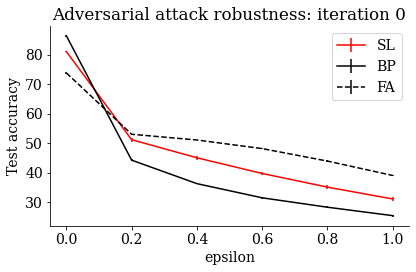

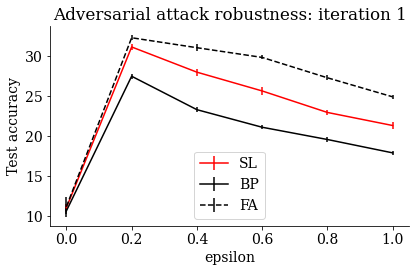

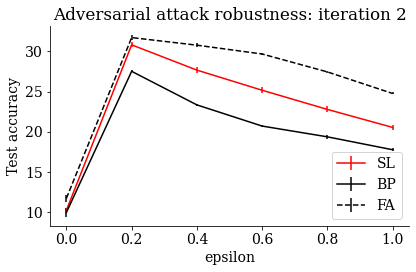

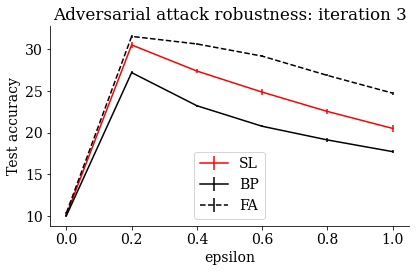

In [59]:
method = 'FA' #'BP'#'FA' #'SLVanilla'
facecolors = {'FA':'white', 'SLVanilla':'red', 'BP':'k'}

epsilons = np.unique(master_df['epsilon'])



for iteration in range(4):
    fig, ax = plt.subplots(1,1)
    for method in ['SLVanilla','BP','FA']:
    
        
        itr_means, itr_sems = [], []
        for j, eps in enumerate(epsilons):
            mehtod_selection = master_df['method']==method
            epsilon_selection = master_df['epsilon']==eps
            sigma2_selection = (master_df['sigma2']-0.0)<0.01
            itr = master_df[(mehtod_selection & epsilon_selection )& sigma2_selection]['itr%d'%iteration]
            itr_means.append(itr.mean())
            itr_sems.append(ss.sem(itr))
            
        ax.errorbar(epsilons,itr_means, itr_sems, label=method_labels[method], color=colors[method], ls=linestyles[method])

#         if measure_name == 'accuracy':
#             ax.set_ylim([0,100])
#         else:
#             ax.set_ylim([0,0.9])

        ax = plt.gca()
        ax.patch.set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.tick_params(axis='y',direction='out', right=False)
        plt.tick_params(axis='x',direction='out', top=False)

        ax.set_xlabel('epsilon')
        ax.set_ylabel('Test %s'%measure_name)
#         if measure_name == 'accuracy':
#             ax.text(1.1, 1, hashname, fontsize=8, rotation=90)
        ax.set_title('Adversarial attack robustness: iteration %d'%(iteration)) #: iteration %d'%(iteration)
        ax.legend()
        plt.tight_layout()

    savedir = path_prefix + '/Results/Symbio/runswithhash/%s/evaluate/'%hashname
#     savedir = path_prefix + '/Results/Symbio/Symbio/%s/'%runname
    
    if not os.path.exists(savedir):
        os.makedirs(savedir)
    fig.savefig(savedir + 'advattack_itr%d_%s.png'%(iteration, measure_name), dpi=200)
    fig.savefig(savedir + 'advattack_itr%d_%s.pdf'%(iteration, measure_name), dpi=200)
    
print(hashname, measure_name)

## Recurrence for noise

### with autoencoders

AsymResNetL10Simple accuracy OR
Nov04-13-32_CIFAR10_d0236dbe9e_AsymResNetL10Simple_599 accuracy


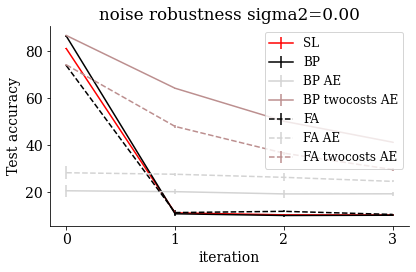

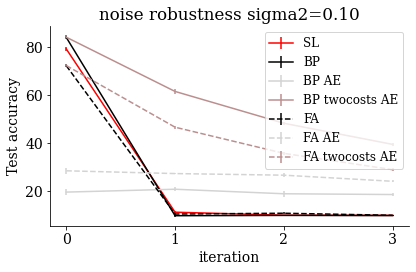

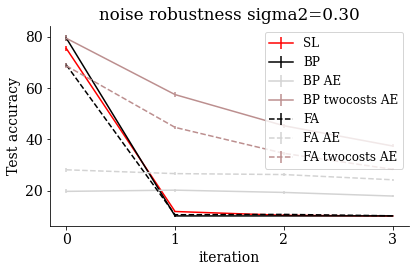

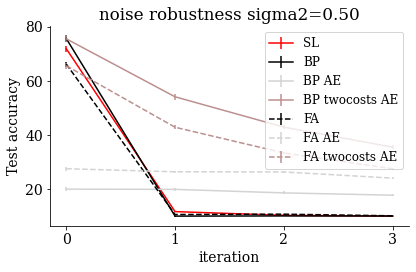

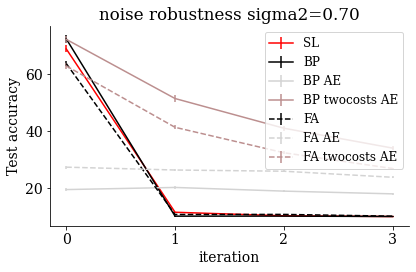

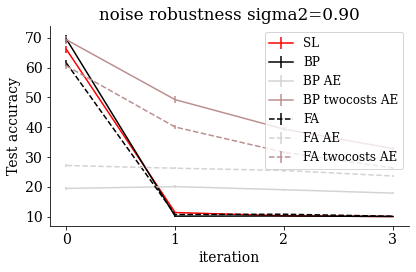

In [60]:
import scipy.stats as ss
 #'BP'#'FA' #'SLVanilla'
facecolors = {'FA':'white', 'SLVanilla':'red', 'BP':'k'}
colors = {'FA':'k', 'BP':'k', 'SLVanilla':'red'}
colors_dd = {'FA':'y', 'BP':'g', }
sigmas = np.unique(master_df['sigma2'])
_, bins = np.histogram(sigmas,5)
sigmas = np.floor(bins*10)/10

for s in sigmas:


    fig, ax = plt.subplots(1,1)
    for method in ['SLVanilla','BP','FA']:


        itr_means, itr_sems = [], []
        for iteration in range(4):
            mehtod_selection = master_df['method']==method
            epsilon_selection = master_df['epsilon']==0.0
            sigma2_selection = (master_df['sigma2']-s)<0.01
            itr = master_df[(mehtod_selection & epsilon_selection )& sigma2_selection]['itr%d'%iteration]
    #         ax.bar(j,itr.mean(), edgecolor=colors[method], color = facecolors[method])
    #         ax.errorbar(j,itr.mean(), ss.sem(itr), color='k' )
            itr_means.append(itr.mean())
            itr_sems.append(ss.sem(itr))
        ax.errorbar(range(4),itr_means, itr_sems, label=method_labels[method], color=colors[method], ls=linestyles[method])
        
        #-----autoencoders
        if method in ['FA','BP']:
            itr_means, itr_sems = [], []
            for iteration in range(4):
                method_selection = master_df_autoencoder['method']==method
                epsilon_selection = master_df_autoencoder['epsilon']==0.0
                sigma2_selection = (master_df_autoencoder['sigma2']-s)<0.01
                itr = master_df_autoencoder[(method_selection & epsilon_selection )& sigma2_selection]['itr%d'%iteration]
        #         ax.bar(j,itr.mean(), edgecolor=colors[method], color = facecolors[method])
        #         ax.errorbar(j,itr.mean(), ss.sem(itr), color='k' )
                itr_means.append(itr.mean())
                itr_sems.append(ss.sem(itr))
            ax.errorbar(range(4),itr_means, itr_sems, label=method_labels[method]+' AE', color=colors_ae[method], ls=linestyles[method])

        
        #-----autoencoders two costs
        if method in ['FA','BP']:
            itr_means, itr_sems = [], []
            for iteration in range(4):
                method_selection = master_df_autoencodertwocosts['method']==method
                epsilon_selection = master_df_autoencodertwocosts['epsilon']==0.0
                sigma2_selection = (master_df_autoencodertwocosts['sigma2']-s)<0.01
                itr = master_df_autoencodertwocosts[(method_selection & epsilon_selection )& sigma2_selection]['itr%d'%iteration]
        #         ax.bar(j,itr.mean(), edgecolor=colors[method], color = facecolors[method])
        #         ax.errorbar(j,itr.mean(), ss.sem(itr), color='k' )
                itr_means.append(itr.mean())
                itr_sems.append(ss.sem(itr))
            ax.errorbar(range(4),itr_means, itr_sems, label=method_labels[method]+' twocosts AE', color=colors_tcae[method], ls=linestyles[method])

        
        
        
        
#          #-----dynamic decoders
#         if method in ['FA','BP']:
#             itr_means, itr_sems = [], []
#             for iteration in range(4):
#                 method_selection = master_df_dynamic['method']==method
#                 epsilon_selection = master_df_dynamic['epsilon']==0.0
#                 sigma2_selection = (master_df_dynamic['sigma2']-s)<0.01
#                 itr = master_df_dynamic[(method_selection & epsilon_selection )& sigma2_selection]['itr%d'%iteration]
#         #         ax.bar(j,itr.mean(), edgecolor=colors[method], color = facecolors[method])
#         #         ax.errorbar(j,itr.mean(), ss.sem(itr), color='k' )
#                 itr_means.append(itr.mean())
#                 itr_sems.append(ss.sem(itr))
#             ax.errorbar(range(4),itr_means, itr_sems, label=method_labels[method]+' Dd', color=colors_dd[method], ls=linestyles[method])

        
        
#         if measure_name == 'accuracy':
#             ax.set_ylim([70,100])
#         else:
#             ax.set_ylim([-0.1,0.8])

        ax = plt.gca()
        ax.patch.set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.tick_params(axis='y',direction='out', right=False)
        plt.tick_params(axis='x',direction='out', top=False)
        ax.set_xticks(range(4))
    #     ax.set_xticklabels(range(4))
        ax.set_xlabel('iteration')
        ax.set_ylabel('Test %s'%measure_name)
    #     if measure_name == 'accuracy':
    #         ax.text(1.1, 1, hashname, fontsize=8, rotation=90)

        ax.set_title('noise robustness sigma2=%0.2f'%(s))
        ax.legend(fontsize=12)
        plt.tight_layout()

    savedir = path_prefix + '/Results/Symbio/runswithhash/%s/evaluate/'%hashname
#     savedir = path_prefix + '/Results/Symbio/Symbio/%s/'%runname
    if not os.path.exists(savedir):
        os.makedirs(savedir)
    fig.savefig(savedir + 'noise_sigma2_wAE_%s_%s.png'%(s, measure_name), dpi=200)
    fig.savefig(savedir + 'noise_sigma2_wAE_%s_%s.pdf'%(s, measure_name), dpi=200)
print(hashname, measure_name, 'OR')
print(runname, measure_name)

In [36]:
master_df_autoencodertwocosts

,method,epsilon,sigma2,itr0,itr1,itr2,itr3
0,FA,0.0,0.901,48.828,44.141,35.938,31.250
1,FA,0.0,0.101,74.219,50.000,33.984,37.109
2,BP,0.0,0.501,60.547,45.312,37.891,37.109
3,FA,0.0,0.301,64.844,47.266,38.281,30.469
4,BP,0.0,0.001,89.453,60.156,48.047,38.281
5,FA,0.0,0.701,51.172,42.578,35.547,30.078
6,BP,0.0,0.101,83.203,55.078,48.438,34.766
7,BP,0.0,0.601,58.203,48.438,33.594,32.031
8,FA,0.0,0.801,48.828,42.188,38.672,29.297
9,BP,0.0,0.201,81.250,50.000,43.750,35.156


In [40]:
itr

0     31.250
1     37.109
3     30.469
5     30.078
8     29.297
10    29.297
12    34.375
13    30.078
16    33.203
17    31.641
Name: itr3, dtype: float64

### without autoenooders

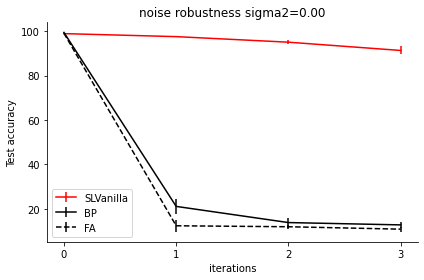

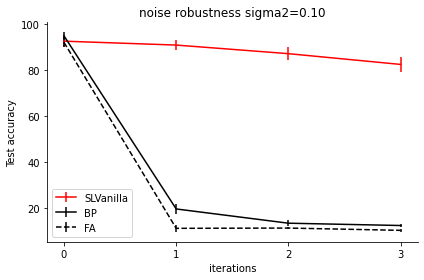

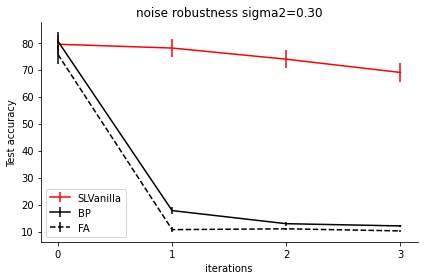

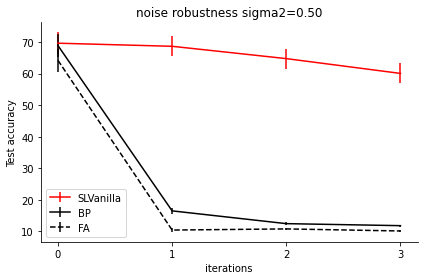

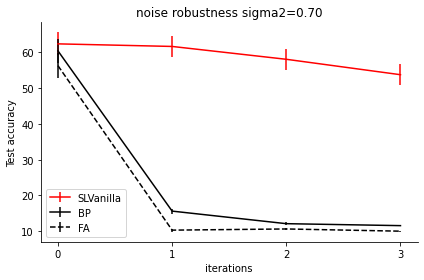

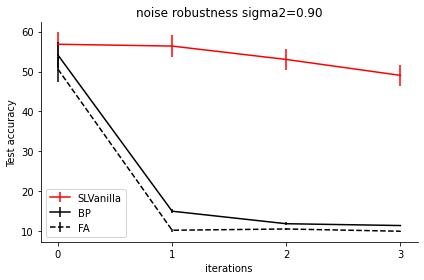

In [99]:
import scipy.stats as ss
 #'BP'#'FA' #'SLVanilla'
facecolors = {'FA':'white', 'SLVanilla':'red', 'BP':'k'}
colors = {'FA':'k', 'BP':'k', 'SLVanilla':'red'}

sigmas = np.unique(master_df['sigma2'])
_, bins = np.histogram(sigmas,5)
sigmas = np.floor(bins*10)/10

for s in sigmas:


    fig, ax = plt.subplots(1,1)
    for method in ['SLVanilla','BP','FA']:


        itr_means, itr_sems = [], []
        for iteration in range(4):
            mehtod_selection = master_df['method']==method
            epsilon_selection = master_df['epsilon']==0.0
            sigma2_selection = (master_df['sigma2']-s)<0.01
            itr = master_df[(mehtod_selection & epsilon_selection )& sigma2_selection]['itr%d'%iteration]
    #         ax.bar(j,itr.mean(), edgecolor=colors[method], color = facecolors[method])
    #         ax.errorbar(j,itr.mean(), ss.sem(itr), color='k' )
            itr_means.append(itr.mean())
            itr_sems.append(ss.sem(itr))
        ax.errorbar(range(4),itr_means, itr_sems, label=method, color=colors[method], ls=linestyles[method])

#         if measure_name == 'accuracy':
#             ax.set_ylim([0,100])
#         else:
#             ax.set_ylim([-0.1,0.8])

        ax = plt.gca()
        ax.patch.set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.tick_params(axis='y',direction='out', right=False)
        plt.tick_params(axis='x',direction='out', top=False)
        ax.set_xticks(range(4))
    #     ax.set_xticklabels(range(4))
        ax.set_xlabel('iterations')
        ax.set_ylabel('Test %s'%measure_name)
    #     if measure_name == 'accuracy':
    #         ax.text(1.1, 1, hashname, fontsize=8, rotation=90)

        ax.set_title('noise robustness sigma2=%0.2f'%(s))
        ax.legend()
        plt.tight_layout()

    savedir = path_prefix + '/Results/Symbio/runswithhash/%s/evaluate/'%hashname
    if not os.path.exists(savedir):
        os.makedirs(savedir)
    fig.savefig(savedir + 'noise_sigma2_%s_%s.png'%(s, measure_name), dpi=200)
    fig.savefig(savedir + 'noise_sigma2_%s_%s.pdf'%(s, measure_name), dpi=200)

## "All we have thus far" curves

/home/tt2684/Research/Results/Symbio/Symbio/Oct20-11-27_CIFAR10_feb1487c9e_hypersearchsimplemodules_770/training_results_SLVanilla.csv
/home/tt2684/Research/Results/Symbio/Symbio/Oct20-11-27_CIFAR10_feb1487c9e_hypersearchsimplemodules_770/training_results_FA.csv
/home/tt2684/Research/Results/Symbio/Symbio/Oct20-11-27_CIFAR10_feb1487c9e_hypersearchsimplemodules_980/training_results_SLVanilla.csv
/home/tt2684/Research/Results/Symbio/Symbio/Oct20-11-27_CIFAR10_feb1487c9e_hypersearchsimplemodules_980/training_results_FA.csv
/home/tt2684/Research/Results/Symbio/Symbio/Oct20-11-27_CIFAR10_feb1487c9e_hypersearchsimplemodules_720/training_results_SLVanilla.csv
/home/tt2684/Research/Results/Symbio/Symbio/Oct20-11-27_CIFAR10_feb1487c9e_hypersearchsimplemodules_720/training_results_FA.csv
/home/tt2684/Research/Results/Symbio/Symbio/Oct20-11-27_CIFAR10_feb1487c9e_hypersearchsimplemodules_525/training_results_SLVanilla.csv
/home/tt2684/Research/Results/Symbio/Symbio/Oct20-11-27_CIFAR10_feb1487c9e_h

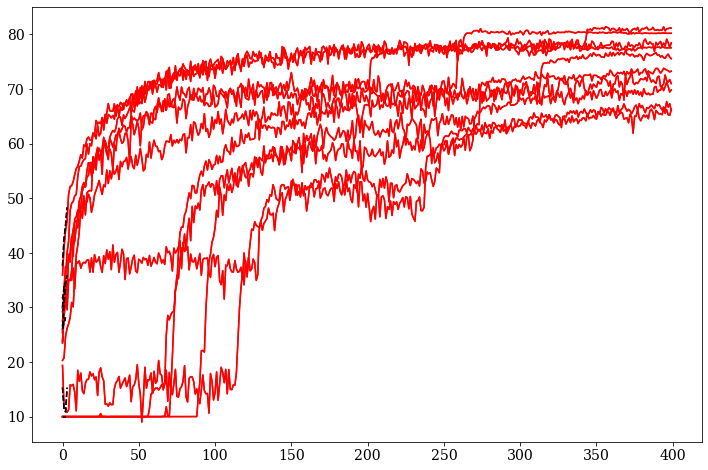

In [33]:
hashname = 'hypersearchsimplemodules'
#'RMSpropRMSpropMNISTFullyConnE150' #'RMSpRMSpFaMNISTAsymResLNet10BNaffPtnc30'
#'RMSpCIFAR10AsymResLNet10BNaff'
#'RMSpRMSpFaMNISTAsymResLNet10BNaffPtnc30' #'RMSpRMSpFaMNISTAsymResLNet10BNaff'
# 'RMSpRMSpMNISTAsymResLNet10BNaffine' 
#'RMSpropRMSpropMNISTAsymResLNet10' #'RMSpropRMSpropMNISTFullyConn' ##'RMSpropRMSpropMNISTFullyConnE150'
methods = ['SLVanilla','BP', 'FA']
colors = {'FA':'k', 'BP':'k', 'SLVanilla':'red'}
linestyles = {'FA':'--', 'BP':'-', 'SLVanilla':'-'}

with open(path_prefix + '/Results/Symbio/runswithhash/%s.txt'%hashname) as f:
    Lines = f.readlines() 

valid_runnames = []
fig, ax = plt.subplots(1,1, figsize=(12,8))
for l in Lines:
    runname = l.strip('\n')
    
    configs = yaml.safe_load(open(path_prefix + '/Results/Symbio/Symbio/%s/configs.yml'%runname, 'r'))
    list_csv_paths = []
    for method in methods:
        p = path_prefix + '/Results/Symbio/Symbio/%s/training_results_%s.csv'%(runname, method)
        if os.path.exists(p):
            print(p)
            df = pd.read_csv(p)
#             if len(list(df['test_acc'])) == configs['epochs']:
            list_csv_paths.append(p)
#     if len(list_csv_paths) == len(methods):
            valid_runnames.append(runname)
        configs = yaml.safe_load(open(path_prefix + '/Results/Symbio/Symbio/%s/configs.yml'%runname, 'r'))

print(len(valid_runnames))

n_epochs = configs['epochs']
arch =  configs['arche'][:-1]

test_init = np.zeros((len(valid_runnames),n_epochs))
test_acc_dict = {}
test_corrd_dict = {}
test_lossd_dict = {}
for method in methods:
    test_acc_dict[method] = copy.deepcopy(test_init)
    test_corrd_dict[method] = copy.deepcopy(test_init)
    test_lossd_dict[method] = copy.deepcopy(test_init)
    
for r, runname in enumerate(valid_runnames):
    configs = yaml.safe_load(open(path_prefix + '/Results/Symbio/Symbio/%s/configs.yml'%runname, 'r'))
    
    for method in methods:
        p = path_prefix + '/Results/Symbio/Symbio/%s/training_results_%s.csv'%(runname, method)
        if os.path.exists(p):
            df = pd.read_csv(p)
            label = method 
            pl = ax.plot(df['test_acc'], label=label, color=colors[method], ls=linestyles[method])
            test_acc_dict[method][r][:len(list(df['test_acc']))] = list(df['test_acc'])
            test_corrd_dict[method][r][:len(list(df['test_acc']))] = list(df['test_corrd'])
            test_lossd_dict[method][r][:len(list(df['test_acc']))] = list(df['test_lossd'])
            
            print(runname, method, max(list(df['test_acc'])))
        

(94.0, 98.0)

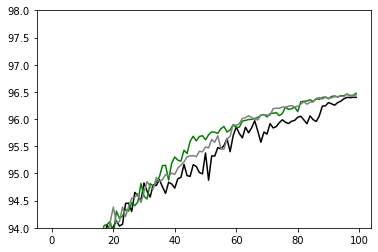

In [66]:
plt.plot(acc_test_dict['BP']/12,'k')
plt.plot(acc_test_dict['SLVanilla']/12,'g')
plt.plot(acc_test_dict['FA']/12,'gray')
plt.ylim([94,98])

[&lt;matplotlib.lines.Line2D at 0x2ae3c47905c0&gt;]

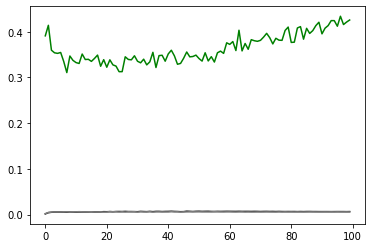

In [71]:
plt.plot(corrd_test_dict['BP']/12,'k')
plt.plot(corrd_test_dict['SLVanilla']/12,'g')
plt.plot(corrd_test_dict['FA']/12,'gray')

(0.0, 40000.0)

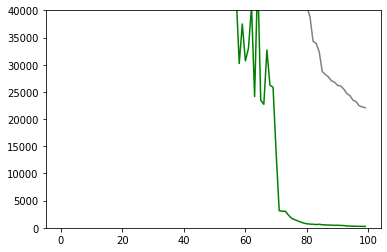

In [77]:
plt.plot(lossd_test_dict['BP']/12,'k')
plt.plot(lossd_test_dict['SLVanilla']/12,'g')
plt.plot(lossd_test_dict['FA']/12,'gray')
plt.ylim([0,40000])


In [53]:
np.mean(results_dict['BP'],0), np.std(results_dict['BP'])

(1133.8692800000001, 40.86001538670293)

In [48]:
np.mean(results_dict['SLVanilla']), np.std(results_dict['SLVanilla'])

(95.61958333333332, 2.040276225511853)

In [49]:
np.mean(results_dict['FA']), np.std(results_dict['FA'])

(95.48608333333333, 1.9930376923318731)

In [99]:
n/3


15.666666666666666

[&lt;matplotlib.lines.Line2D at 0x2ae3c38fd0b8&gt;]

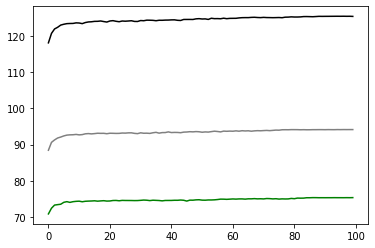

In [100]:
plt.plot(acc_test_dict['BP']/(n/3),'k')
plt.plot(acc_test_dict['SLVanilla']/(n/3),'g')
plt.plot(acc_test_dict['FA']/(n/3),'gray')
# plt.ylim([94,98])

## Generate Figures

In [18]:
runname = 'Oct22-11-36_CIFAR10_4623412840_706' #'Apr01-18-30_CIFAR10_eab5f35996_115'

In [19]:
import numpy as np
import pandas as pd
import copy
import os
import json
from utils import helper_functions
import yaml
import scipy.stats as ss
find = helper_functions.find
import matplotlib
matplotlib.use('agg')
import matplotlib.pylab as plt
import pprint 
pp = pprint.PrettyPrinter(indent=4)
import socket
if socket.gethostname()[0:4] in  ['node','holm','wats']:
    path_prefix = '/rigel/issa/users/Tahereh/Research'
elif socket.gethostname() == 'SYNPAI':
    path_prefix = '/hdd6gig/Documents/Research'
elif socket.gethostname()[0:2] == 'ax':
    path_prefix = '/home/tt2684/Research'

class Args:
    config_file = '/home/tt2684/Research/Results/Symbio/Symbio/%s/configs.yml'%runname
    eval_swept_var = ''
    eval_time = 'Now'
    eval_RDMs = False
    


args = Args()

if args.config_file:
    with open(args.config_file, 'r') as stream:
        data = yaml.safe_load(stream)        
#     delattr(args, 'config_file')
    arg_dict = args.__dict__
    for key, value in data.items():
        setattr(args, key, value)
print(args.resultsdir.split('/Research')[1])

if not(hasattr(args, 'databasedir')):
    project = 'Symbio'#'SYY_MNIST'
    arch = 'E%sD%s'%(args.arche, args.archd)
    args.databasedir  = path_prefix+'/Results/database/%s/%s/%s/'%(project,arch,args.dataset)

/Results/Symbio/Symbio/Oct22-11-36_CIFAR10_4623412840_706/


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


['BP', 'FA', 'SLVanilla', 'SLError', 'SLAdvImg', 'SLAdvCost', 'SLConv1', 'SLGrConv1', 'SLLatentRobust']
['BP', 'FA', 'SLVanilla', 'SLError', 'SLAdvImg', 'SLAdvCost', 'SLConv1', 'SLGrConv1', 'SLLatentRobust', 'BPCC0', 'FACC0', 'SLVanillaCC0', 'SLErrorCC0', 'SLAdvImgCC0', 'SLAdvCostCC0', 'SLConv1CC0', 'SLGrConv1CC0', 'SLLatentRobustCC0', 'BPCC1', 'FACC1', 'SLVanillaCC1', 'SLErrorCC1', 'SLAdvImgCC1', 'SLAdvCostCC1', 'SLConv1CC1', 'SLGrConv1CC1', 'SLLatentRobustCC1']
['BP', 'FA', 'SLVanilla', 'SLError', 'SLAdvImg', 'SLAdvCost', 'SLConv1', 'SLGrConv1', 'SLLatentRobust', 'BPCC0', 'FACC0', 'SLVanillaCC0', 'SLErrorCC0', 'SLAdvImgCC0', 'SLAdvCostCC0', 'SLConv1CC0', 'SLGrConv1CC0', 'SLLatentRobustCC0', 'BPCC1', 'FACC1', 'SLVanillaCC1', 'SLErrorCC1', 'SLAdvImgCC1', 'SLAdvCostCC1', 'SLConv1CC1', 'SLGrConv1CC1', 'SLLatentRobustCC1']
/home/tt2684/Research/Results/database/Symbio/Easymresnet18DasymresnetT18/CIFAR10/Oct22-11-36_CIFAR10_4623412840_706_BP.json was not found
/home/tt2684/Research/Results

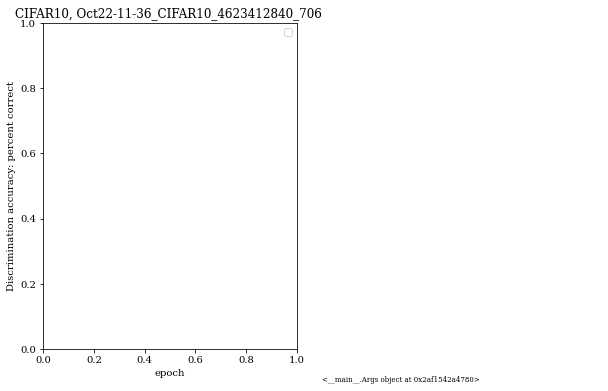

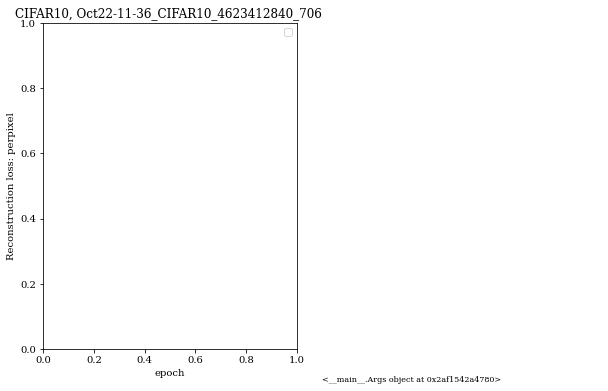

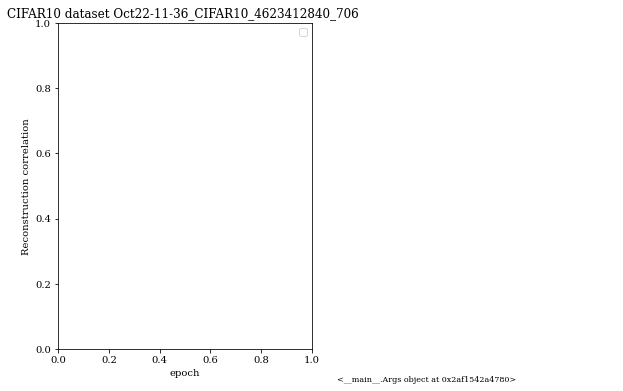

<Figure size 720x432 with 0 Axes>

In [20]:

%matplotlib inline


base_methods = ['BP', 'FA', 'SLVanilla', 'SLError', 'SLAdvImg', 'SLAdvCost','SLConv1', 'SLGrConv1', 'SLLatentRobust']
all_methods = copy.deepcopy(base_methods)

print(base_methods)
[all_methods.extend([m+'CC0'] )for m in base_methods]
[all_methods.extend([m+'CC1'] )for m in base_methods]
print(all_methods)
colors = {'BP':'k', 'FA':'indigo', 'SLVanilla':'firebrick','SLError':'navy', 'SLAdvImg':'c','SLAdvCost':'darkolivegreen','SLLatentRobust':'yellow',
               'BPCC0':'dimgrey', 'FACC0':'blueviolet', 'SLVanillaCC0':'r','SLErrorCC0':'blue', 'SLAdvImgCC0':'c','SLAdvCostCC0':'green','SLLatentRobustCC0':'khaki',
               'BPCC1':'lightgrey', 'FACC1':'mediumpurple', 'SLVanillaCC1':'salmon','SLErrorCC1':'lightsteelblue', 'SLAdvImgCC1':'c','SLAdvCostCC1':'lightgreen','SLLatentRobustCC1':'darkgoldenrod',
               'SLConv1':'sandybrown', 'SLGrConv1':'brown' }
# colors =  {'BP':'k', 'FA':'grey', 'SLVanilla':'r','SLRobust':'salmon',
#             'SLError':'orange', 'SLErrorTemplateGenerator':'yellow', 'BSL':'b','SLGAN':'m'}


methods = all_methods #['BP','FA','SLVanilla','SLGAN' ]#',,'SLRobust', 'SLError''SLRobust', 'SLError' ,'BSL',  'SLErrorTemplateGenerator' 'SLError', 

print(methods)

if args.eval_RDMs:
    RDMs_dict = {}
    layers = ['RDM_conv1_FF', 'RDM_conv1_FB', 'RDM_latents_FF', 'RDM_upsample2',]
    import h5py
    for method in  methods:
        hf = h5py.File(args.resultsdir+'RDMs_%s.h5'%method, 'r')
        
        RDM_list = [np.array(hf.get(layers[0])),
        np.array(hf.get(layers[1])),
        np.array(hf.get(layers[2])),
        np.array(hf.get(layers[3]))]
        RDMs_dict.update({method:RDM_list}) 

if len(args.eval_swept_var):
    if args.eval_swept_var=='sigma2':
        non_swept_var='epsilon'
        non_swept_var_value=0.0
        swept_vars = np.arange(0, 1.1, 0.1).tolist() #[0, 0.2, 0.4, 0.6, 0.8, 1]
    
    print(swept_vars)
    sigma2 = 0.0
    maxitr = 4
    Test_acce = {}
    # epsilons = [0, 0.2, 0.4, 0.6, 0.8, 1]
    existing_methods = []
    for method in  methods:
        Test_acce_arr = np.zeros((4, len(swept_vars)))
        for iv , swept_var in enumerate(swept_vars):
            # json_name = '%s_%s_eval%s_maxitr4_epsilon%0.1e.json'%(args.runname, method, args.eval_time, epsilon)
            if args.eval_swept_var=='sigma2':
                json_name = '%s%s_%s_eval%s_maxitr%d_epsilon%0.1e_noisesigma2%.1f.json'%(args.databasedir,args.runname, method, args.eval_time, maxitr, non_swept_var_value, swept_var)
            else:
                json_name = '%s%s_%s_eval%s_maxitr%d_epsilon%0.1e_noisesigma2%.1f.json'%(args.databasedir,args.runname, method, args.eval_time, maxitr, swept_var, sigma2)
            print(json_name)
            try:
                with open(json_name, 'r') as fp:
                                
                    results = json.load(fp)   
                    Test_acce_arr[:, iv] = results['Test_acce']     
                    Test_acce.update({method:Test_acce_arr})
                existing_methods.append(method)
            except FileNotFoundError:
                continue

else:
    Test_acce = {}
    Train_acce = {}
    Test_lossd = {}
    Train_lossd = {}
    Test_lossl = {}
    Train_lossl = {}
    Test_corrd = {}
    Train_corrd = {}
    Learning_rate = {}
    
    Align_corr_first = {}
    Align_corr_last = {}
    
    Align_ratios_first = {}
    Align_ratios_last = {}
    
    Forward_norm_first = {}
    Forward_norm_last = {}
    
    existing_methods = []
    for method in  methods:
        
        try:
            with open('%s%s_%s.json'%(args.databasedir,args.runname, method), 'r') as fp:
                results = json.load(fp)        
                Test_acce.update({method:results['Test_acce']})
                Train_acce.update({method:results['Train_acce']})

                Test_lossd.update({method:results['Test_lossd']})
                Train_lossd.update({method:results['Train_lossd']})


                Test_lossl.update({method:results['Test_lossl']})
                Train_lossl.update({method:results['Train_lossl']})

                Test_corrd.update({method:results['Test_corrd']})
                Train_corrd.update({method:results['Train_corrd']})
                
                Learning_rate.update({method:results['lrF']})
                
                Align_corr_first.update({method:results['Alignments_corrs_first_layer']})
                Align_corr_last.update({method:results['Alignments_corrs_last_layer']})
                
                Align_ratios_first.update({method:results['Alignments_ratios_first_layer']})
                Align_ratios_last.update({method:results['Alignments_ratios_last_layer']})
                
                Forward_norm_first.update({method:results['Forward_norm_first_layer']})
                Forward_norm_last.update({method:results['Forward_norm_last_layer']})
                              
            existing_methods.append(method)
        except FileNotFoundError:
            print('%s%s_%s.json was not found'%(args.databasedir,args.runname, method))
            continue
                        

existing_methods = np.unique(existing_methods)


# args.resultsdir = args.resultsdir.replace('ConvMNIST_playground', 'SYY2020')
resultsdir = path_prefix + args.resultsdir.split('/Research')[1]
pp.pprint(vars(args))
# I used to save results into numpy files

# list_npy = find( '*.npy', resultsdir )
# print(list_npy)
# print(os.listdir(resultsdir))

# results = {}
# for f in list_npy:
#     print(f[:-4])
#     k = f[:-4].split('_')[0] + '_%s'%f[:-4].split('_')[1]
#     r = np.load(resultsdir + f)
#     results.update({k:r})
# print(results.keys())

if args.eval_RDMs:
    # bar plots
    corrs = [ss.pearsonr(RDMs_dict['BP'][l].ravel(), RDMs_dict['SLVanilla'][l].ravel())[0] for l in range(4)]
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=[5.5,4])
    
    width = 0.35
    dist = width/4

    l=0
    axes.bar([0],1-ss.pearsonr(RDMs_dict['BP'][l].ravel(), RDMs_dict['SLVanilla'][l].ravel())[0],width=width, label='1st layer-forward', color='salmon')
    l=1
    axes.bar([width+dist],1-ss.pearsonr(RDMs_dict['BP'][l].ravel(), RDMs_dict['SLVanilla'][l].ravel())[0],width=width, label='1st layer-feedback',color='r')
    l=2
    axes.bar([0.5+3/2*width+2*dist],1-ss.pearsonr(RDMs_dict['BP'][l].ravel(), RDMs_dict['SLVanilla'][l].ravel())[0],width=width, label='top layer-forward',color='lightblue')
    l=3
    axes.bar([0.5+5/2*width+3*dist],1-ss.pearsonr(RDMs_dict['BP'][l].ravel(), RDMs_dict['SLVanilla'][l].ravel())[0],width=width, label='top layer-feedback',color='b')
    
    mixed_1st_layer_SLVanilla = np.concatenate((RDMs_dict['SLVanilla'][0].ravel(),RDMs_dict['SLVanilla'][1].ravel()))
    mixed_top_layer_SLVanilla = np.concatenate((RDMs_dict['SLVanilla'][2].ravel(),RDMs_dict['SLVanilla'][3].ravel()))

    mixed_1st_layer_BP = np.concatenate((RDMs_dict['BP'][0].ravel(),RDMs_dict['BP'][1].ravel()))
    mixed_top_layer_BP = np.concatenate((RDMs_dict['BP'][2].ravel(),RDMs_dict['BP'][3].ravel()))


    print('SHAPE',mixed_1st_layer_BP.shape)
    axes.bar([1+7/2*width+4*dist],1-ss.pearsonr(mixed_1st_layer_BP, mixed_1st_layer_SLVanilla)[0],width=width, label='1st layer-mixed',color='firebrick')
    axes.bar([1+9/2*width+5*dist],1-ss.pearsonr(mixed_top_layer_BP, mixed_top_layer_SLVanilla)[0],width=width, label='top layer-mixed',color='darkblue')
    
    
    
    axes.legend(loc='upper right')
    axes.set_ylabel('Dissimilarity between RSMs of SL and BP')
    axes.set_xticks([])
    ax = plt.gca()
    ax.patch.set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.tick_params(axis='y',direction='out', right=False)
    plt.tick_params(axis='x',direction='out', top=False)
    fig.savefig(args.resultsdir+'Bars_RDMs_comparisons_%s.png'%(args.runname), dpi=200)
    fig.savefig(args.resultsdir+'Bars_RDMs_comparisons_%s.pdf'%(args.runname), dpi=200)
    plt.clf()

    #

    # RDM consistencies
    RDMs_consistencies = np.zeros((len(methods), len(methods), 4))
    for i, methodi in enumerate(methods):
        for j, methodj in enumerate(methods):
            for l in range(4):
                RDMs_consistencies[i, j , l] = ss.pearsonr(RDMs_dict[methodi][l].ravel(), RDMs_dict[methodj][l].ravel())[0]
                print(methodi,methodj,RDMs_consistencies[:,:,l ])
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=[12,4])
    for l in range(4):
        im = axes[l].matshow(RDMs_consistencies[:, : , l], vmin=0, vmax=1, origin='lower', cmap=plt.cm.get_cmap('Spectral_r'))
        axes[l].set_xticks(range(len(methods)))
        axes[l].set_xticklabels(methods)
        if l ==0:
            axes[l].set_yticks(range(len(methods)))
            axes[l].set_yticklabels(methods)
        else:
            axes[l].set_yticks([])

        
        axes[l].set_title(layers[l][4:], y=1.25)
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
    fig.colorbar(im, cax=cbar_ax)
    fig.suptitle('Correlation between RDMs %s, %s'%(args.runname, args.dataset))
    plt.show()
#     fig.savefig(args.resultsdir+'RDMs_comparisons_%s.png'%(args.runname), dpi=200)
#     fig.savefig(args.resultsdir+'RDMs_comparisons_%s.pdf'%(args.runname), dpi=200)
#     plt.clf()

elif len(args.eval_swept_var):
    print(existing_methods)
    #------ accuracy ------------
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=[20,4])

    for itr in range(4):
        for method in existing_methods:
            if itr == 3 :
                axes[itr].plot(swept_vars, Test_acce[method][itr], color=colors[method], label=method)
            else:
                axes[itr].plot(swept_vars, Test_acce[method][itr], color=colors[method])

        axes[itr].set_xlabel(args.eval_swept_var)
        axes[itr].set_ylabel('Discrimination accuracy: percent correct')
        axes[itr].set_title('itr = %d'%itr)
        axes[itr].set_ylim([0,100])
        

        fig.suptitle('%s dataset %s eval%s %s=%s'%(args.dataset, args.runname, args.eval_time, non_swept_var ,non_swept_var_value))

        # axes[1].set_xticks([])
        # axes[1].set_yticks([])
        # axes[1].axis('off')
        # txt= axes[1].text(-0.1,-0.1,str(args),wrap=True, fontsize=8 )
        # txt._get_wrap_line_width = lambda : 200

    axes[3].legend()

#     fig.savefig(resultsdir+'robust_results_eval%s_%s_%s.pdf'%(args.eval_time, non_swept_var,non_swept_var_value), dpi=200)
#     fig.savefig(resultsdir+'robust_results_eval%s_%s_%s.png'%(args.eval_time, non_swept_var,non_swept_var_value), dpi=200)

    plt.clf()


else:

    #------ accuracy ------------
    summary_dic_Train = {}
    summary_dic_Test = {}
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[10,6])

    for method in existing_methods:
         
            axes[0].plot(Train_acce[method], color=colors[method], ls='--')
            axes[0].plot(Test_acce[method], color=colors[method], label=method)
        
            print('Train ACC','%s:'%method, Train_acce[method][-1], end =" ")
            print('**')
            print('Test ACC','%s:'%method, Test_acce[method][-1], end =" ")
            print('**')
            summary_dic_Train.update({method: [Train_acce[method][-1], Train_lossd[method][-1], Train_lossl[method][-1],Train_corrd[method][-1], len(Train_acce[method])]})
            summary_dic_Test.update({method: [Test_acce[method][-1], Test_lossd[method][-1], Test_lossl[method][-1],Test_corrd[method][-1], len(Test_acce[method])]})

    df_train = pd.DataFrame.from_dict(summary_dic_Train, orient='index', columns=['Accuracy', 'LossPixel','LossLatent','CorrPixel','Epoch'])
    df_train = df_train.sort_values('Accuracy', ascending=False)

    df_test = pd.DataFrame.from_dict(summary_dic_Test, orient='index', columns=['Accuracy', 'LossPixel','LossLatent','CorrPixel','Epoch'])
    df_test = df_test.sort_values('Accuracy', ascending=False)
    print('*Train*')
    print(df_train)
    print('*Test*')
    print(df_test)
    df_train.to_csv(args.resultsdir+'df_train_%s.csv'%args.runname, sep=',')
    df_test.to_csv(args.resultsdir+'df_test_%s.csv'%args.runname, sep=',')
    # # axes[0].plot(results['SLBP_Train'][:,1],  color='lightgrey', label='SLBP %.2f'%results['SLBP_Test'][0,1])
    # axes[0].plot(results['SLDecoderRobustOutput_Train'][:,1],  color='lightgrey', label='SLDecoderRobustOutput %.2f'%results['SLDecoderRobustOutput_Test'][0,1])

    axes[0].set_xlabel('epoch')
    axes[0].set_ylabel('Discrimination accuracy: percent correct')
    axes[0].set_title('%s, %s '%(args.dataset, args.runname))
    axes[0].legend()

    axes[1].set_xticks([])
    axes[1].set_yticks([])
    axes[1].axis('off')
    txt= axes[1].text(-0.1,-0.1,str(args),wrap=True, fontsize=7 )
    txt._get_wrap_line_width = lambda : 200


#     fig.savefig(resultsdir+'acc_results_%depochs.pdf'%args.epochs, dpi=200)
#     fig.savefig(resultsdir+'acc_results_%depochs.png'%args.epochs, dpi=200)
#     plt.show()
#     plt.clf()

    #------ reconstruction loss ------------
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[10,6])
    
    for method in existing_methods:
        
        axes[0].plot(Train_lossd[method], color=colors[method], ls='--')

        axes[0].plot(Test_lossd[method], color=colors[method], label=method)
  

    axes[0].set_xlabel('epoch')
    axes[0].set_ylabel('Reconstruction loss: perpixel')
    axes[0].set_title('%s, %s '%(args.dataset, args.runname))
    axes[0].legend()

    axes[1].set_xticks([])
    axes[1].set_yticks([])
    axes[1].axis('off')
    txt= axes[1].text(-0.1,-0.1,str(args),wrap=True, fontsize=8 )
    txt._get_wrap_line_width = lambda : 200


#     fig.savefig(resultsdir+'lossd_results_%depochs.pdf'%args.epochs, dpi=200)
#     fig.savefig(resultsdir+'lossd_results_%depochs.png'%args.epochs, dpi=200)

#     plt.clf()



    #------ reconstruction corr ------------
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[10,6])

    for method in existing_methods:


        axes[0].plot(Train_corrd[method], color=colors[method], ls='--')

        axes[0].plot(Test_corrd[method], color=colors[method], label=method)

    axes[0].set_xlabel('epoch')
    axes[0].set_ylabel('Reconstruction correlation')
    axes[0].set_title('%s dataset %s '%(args.dataset, args.runname))
    axes[0].legend()

    axes[1].set_xticks([])
    axes[1].set_yticks([])
    axes[1].axis('off')
    txt= axes[1].text(-0.1,-0.1,str(args),wrap=True, fontsize=8 )
    txt._get_wrap_line_width = lambda : 200


# #     fig.savefig(resultsdir+'corrd_results_%depochs.pdf'%args.epochs, dpi=200)
# #     fig.savefig(resultsdir+'corrd_results_%depochs.png'%args.epochs, dpi=200)

#     plt.clf()
#     plt.show()

    #------ alignment corr ------------
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[10,6])

    for method in existing_methods:


        axes[0].plot(Align_corr_first[method], color=colors[method], ls='--',label=method)

    axes[0].set_xlabel('epoch')
    axes[0].set_ylabel('Alignment correlation')
    axes[0].set_title('%s dataset %s '%(args.dataset, args.runname))
    axes[0].legend()

    axes[1].set_xticks([])
    axes[1].set_yticks([])
    axes[1].axis('off')
    txt= axes[1].text(-0.1,-0.1,str(args),wrap=True, fontsize=8 )
    txt._get_wrap_line_width = lambda : 200


#     fig.savefig(resultsdir+'corrd_results_%depochs.pdf'%args.epochs, dpi=200)
#     fig.savefig(resultsdir+'corrd_results_%depochs.png'%args.epochs, dpi=200)

    plt.clf()
    plt.show()
    
    


In [19]:
 existing_methods

array(['BP', 'FA', 'SLAdvCost', 'SLAdvImg', 'SLError', 'SLLatentRobust',
       'SLVanilla'], dtype='<U14')

Text(0.5, 0.92, 'CIFAR10 dataset Apr03-12-13_CIFAR10_9578f81f20_192 ')

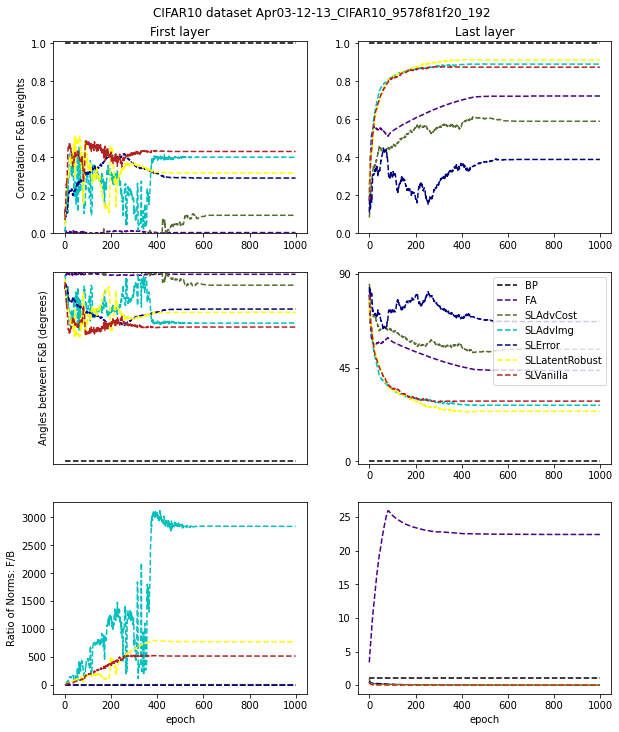

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=[10,12])

for method in existing_methods:


    axes[0,0].plot(Align_corr_first[method], color=colors[method], ls='--',label=method)
    axes[0,1].plot(Align_corr_last[method], color=colors[method], ls='--',label=method)
    
    axes[1,0].plot(180*np.arccos(np.array(Align_corr_first[method]))/np.pi, color=colors[method], ls='--',label=method)
    axes[1,1].plot(180*np.arccos(np.array(Align_corr_last[method]))/np.pi, color=colors[method], ls='--',label=method)

    axes[2,0].plot(Align_ratios_first[method], color=colors[method], ls='--',label=method)
    axes[2,1].plot(Align_ratios_last[method], color=colors[method], ls='--',label=method)



axes[0,0].set_ylabel('Correlation F&B weights')
axes[1,0].set_ylabel('Angles between F&B (degrees)')
axes[2,0].set_ylabel('Ratio of Norms: F/B')

axes[0,0].set_ylim([0,1.01])
axes[0,1].set_ylim([0,1.01])
axes[1,0].set_ylim([-1,91])
axes[1,1].set_ylim([-1,91])

axes[1,0].set_yticks([0,45,90])
axes[1,1].set_yticks([0,45,90])

axes[1,1].legend()

axes[2,0].set_xlabel('epoch')
axes[2,1].set_xlabel('epoch')

axes[0,0].set_title('First layer')
axes[0,1].set_title('Last layer')

axes[1,0].set_xticks([])
axes[1,0].set_yticks([])
# axes[1,0].axis('off')
# txt= axes[1,0].text(-0.1,-0.1,str(args),wrap=True, fontsize=8 )
# txt._get_wrap_line_width = lambda : 200
fig.suptitle('%s dataset %s '%(args.dataset, args.runname), y=0.92)

#     fig.savefig(resultsdir+'Alignment_results_%depochs.pdf'%args.epochs, dpi=200)
#     fig.savefig(resultsdir+'Alignment_results_%depochs.png'%args.epochs, dpi=200)



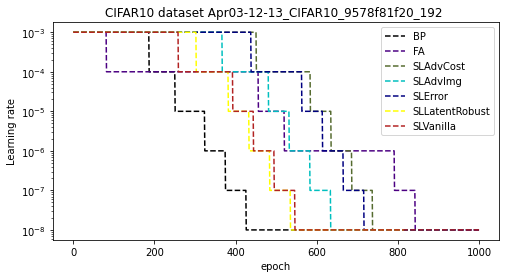

In [105]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=[8,4])

for method in existing_methods:

    axes.plot(Learning_rate[method], color=colors[method], ls='--',label=method)
    
axes.set_yscale('log')

axes.set_xlabel('epoch')
axes.set_ylabel('Learning rate')
axes.set_title('%s dataset %s '%(args.dataset, args.runname))
axes.legend()



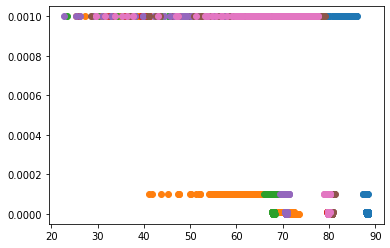

In [106]:
for method in existing_methods:
    plt.scatter(Test_acce[method],Learning_rate[method])
    ss.pearsonr(Test_acce[method],Learning_rate[method])

In [108]:
method='SLAdvImg'
print(ss.pearsonr(Test_acce[method],Learning_rate[method]))
print(ss.pearsonr(Test_corrd[method],Learning_rate[method]))

(-0.5944014199492644, 5.7736479588211e-91)
(-0.6651103048858464, 3.1688250041556924e-121)
